In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
pd.set_option('display.max_colwidth', 300)

In [5]:
df = pd.read_csv('data/raw/movies.csv')

In [6]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [18]:
print(df['rating'].nunique())
#print(df['rating'].value_counts())
print(df['rating'].unique())

12
['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA' 'TV-14']


In [8]:
# le = LabelEncoder()
# rating = df['rating']
# rating_codif = le.fit_transform(rating)
# df['rating_codif'] = le.fit_transform(df['rating'])

'PG' (Parental Guidance): Películas clasificadas como PG suelen tener un atractivo amplio al público, ya que son adecuadas para una audiencia más amplia, incluyendo familias.

'G' (General Audience): Similar a PG, las películas clasificadas como G son aptas para todas las edades, lo que puede atraer a un público más amplio, especialmente a familias con niños pequeños.

'PG-13' (Parents Strongly Cautioned): Aunque restricciones para menores de 13 años, las películas clasificadas como PG-13 a menudo son populares ya que ofrecen un equilibrio entre contenido accesible y una historia más madura.

'TV-14' (Parents Strongly Cautioned): Programas o películas con esta clasificación pueden atraer a un público adolescente y joven adulto.

'R' (Restricted): Aunque restringido, las películas clasificadas como R pueden atraer a un público adulto dispuesto a consumir contenido más maduro.

'TV-MA' (Mature Audiences): Contenido específicamente diseñado para adultos, lo que puede atraer a un público más maduro.

'NC-17' (No one 17 and under admitted): Aunque puede tener un atractivo más limitado debido a las restricciones de edad, algunas películas destinadas a un público adulto pueden beneficiarse de esta clasificación.

'X': Antiguamente utilizado para contenido para adultos, ahora reemplazado en gran medida por 'NC-17'. Puede tener un atractivo limitado debido a su asociación con contenido explícito.

'Approved': Una clasificación utilizada en el pasado; su relevancia actual puede ser limitada.

'Not Rated' y 'Unrated': Estas clasificaciones pueden variar en su impacto en la taquilla, ya que a veces indican películas independientes o menos convencionales que podrían atraer a audiencias específicas.

In [6]:
mapeo_rating = {'Unrated':0,
                'Not Rated':1,
                'Approved':2,
                'X':3,
                'NC-17':4,
                'TV-MA':5,
                'R':6,
                'TV-14':7,
                'PG-13':8,
                'G':9,
                'PG':10
}

In [7]:
df['rating_mapped'] = df['rating'].map(mapeo_rating)

In [20]:
print(df['genre'].nunique())
#print(df['rating'].value_counts())
print(df['genre'].unique())

19
['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Western'
 'Thriller' 'History' 'Mystery' 'Sport' 'Musical']


In [21]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
df = pd.get_dummies(df, columns=['genre'], prefix='genre', dtype=int)

In [23]:
df.head()

,name,rating,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western
0,The Shining,R,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,The Blue Lagoon,R,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Star Wars: Episode V - The Empire Strikes Back,PG,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Airplane!,PG,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Caddyshack,R,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# le = LabelEncoder()
# genre = df['genre']
# genre_codif = le.fit_transform(genre)
# df['genre_codif'] = le.fit_transform(df['genre'])

In [10]:
df['country_date'] = df['released'].str.extract(r'\((.*?)\)')

In [25]:
# df['month2'] = df['released'].str.extract(r'([a-zA-Z]+)')

In [100]:
print(df['director'].nunique())
#print(df['rating'].value_counts())
print(df['director'].unique())

2949
['Stanley Kubrick' 'Randal Kleiser' 'Irvin Kershner' ... 'Nkanya Nkwai'
 'James Randall' 'Pereko Mosia']


In [9]:
mapeo_directores= {'Stanley Kubrick': 9,
                    'Randal Kleiser': 5,
                    'Irvin Kershner': 6,
                    'Jim Abrahams': 4,
                    'Harold Ramis': 7,
                    'Sean S. Cunningham': 3,
                    'John Landis': 6,
                    'Martin Scorsese': 8,
                    'Richard Lester': 5,
                    'Walter Hill': 6,
                    'Buddy Van Horn': 4,
                    'Jamie Uys': 3,
                    'Robert Altman': 7,
                    'Robert Redford': 6,
                    'Brian De Palma': 7,
                    'Jeannot Szwarc': 4,
                    'Alan Parker': 6,
                    'Colin Higgins': 4,
                    'John Carpenter': 7,
                    'Sidney Poitier': 5,
                    'William Friedkin': 7,
                    'Michael Cimino': 5,
                    'Don Taylor': 4,
                    'Robert Greenwald': 4,
                    'James Bridges': 5,
                    'Ken Russell': 4,
                    'Ron Maxwell': 4,
                    'Jerry Jameson': 4,
                    'Stuart Rosenberg': 5,
                    'Paul Schrader': 6,
                    'Tony Bill': 5,
                    'Paul Lynch': 4,
                    'Hal Needham': 4,
                    'Lamont Johnson': 4,
                    'Jay Sandrich': 4,
                    'Howard Zieff': 4,
                    'Floyd Mutrux': 4,
                    'Kevin Connor': 4,
                    'Richard Fleischer': 5,
                    'Michael Apted': 5,
                    'John Hough': 4,
                    'Bruce Beresford': 5,
                    'Richard Rush': 5,
                    'Art Linson': 4,
                    'Mike Newell': 5,
                    'Tommy Chong': 3,
                    'Michael Ritchie': 5,
                    'Ulli Lommel': 3,
                    'Clive Donner': 4,
                    'Moustapha Akkad': 4,
                    'Woody Allen': 8,
                    'Jonathan Demme': 6,
                    'Nancy Walker': 4,
                    'Clint Eastwood': 8,
                    'Federico Fellini': 7,
                    'Lang Elliott': 4,
                    'James Goldstone': 4,
                    'Joe Camp': 3,
                    'Eric Karson': 3,
                    'James L. Conway': 4,
                    'Vincent McEveety': 4,
                    'Joel Oliansky': 4,
                    'Claudia Weill': 4,
                    'Jerry Schatzberg': 4,
                    'Daniel Petrie': 4,
                    'Anne Bancroft': 5,
                    'Vladimir Menshov': 4,
                    'Piers Haggard': 4,
                    'Bill Persky': 4,
                    'Martin Davidson': 4,
                    'Gary Weis': 4,
                    'Bill Melendez': 4,
                    'Marty Feldman': 4,
                    'Alan Rudolph': 4,
                    'Sidney Lumet': 7,
                    'Charles Jarrott': 4,
                    'Walter Bernstein': 4,
                    'Paul Mazursky': 5,
                    'Franco Rosso': 4,
                    'Kieth Merrill': 4,
                    'John Huston': 6,
                    'Gordon Willis': 4,
                    'Jack Smight': 4,
                    'Paul Grimault': 4,
                    'Gilbert Cates': 4,
                    'Michael Pressman': 4,
                    'Édouard Molinaro': 4,
                    'Chuck Barris': 3,
                    'Mike Nichols': 7,
                    'Larry Peerce': 4,
                    'Buck Henry': 4,
                    'Wing-Cho Yip': 4,
                    'Steven Spielberg': 9,
                    'Lawrence Kasdan': 6,
                    'Sam Raimi': 7,
                    'Bob Clark': 5,
                    'Desmond Davis': 4,
                    'John Boorman': 6,
                    'George Miller': 7,
                    'Wolfgang Petersen': 6,
                    'Ivan Reitman': 7,
                    'Andrzej Zulawski': 5,
                    'Michael Mann': 7,
                    'Franco Zeffirelli': 6,
                    'Terry Gilliam': 8,
                    'Alan Alda': 5,
                    'Steve Miner': 5,
                    'David Cronenberg': 7,
                    'John Glen': 5,
                    'Rick Rosenthal': 4,
                    'Harold Becker': 5,
                    'Warren Beatty': 6,
                    'Mark Rydell': 5,
                    'Directors': 0,
                    'Hugh Hudson': 4,
                    'Sydney Pollack': 6,
                    'John Derek': 4,
                    'Steve Gordon': 4,
                    'Louis Malle': 6,
                    'Carl Gottlieb': 4,
                    'Gary Sherman': 4,
                    'Mel Brooks': 6,
                    'Joe Dante': 6,
                    'Matthew Robbins': 4,
                    'Ivan Passer': 4,
                    'Jean-Jacques Annaud': 6,
                    'Graham Baker': 4,
                    'Frank Perry': 4,
                    'Alan Myerson': 4,
                    'Bob Rafelson': 5,
                    'Milos Forman': 7,
                    'Wes Craven': 6,
                    'Peter Yates': 5,
                    'Peter Weir': 7,
                    'Peter Hyams': 5,
                    'Blake Edwards': 6,
                    'Lucio Fulci': 4,
                    'John Irvin': 4,
                    'George Mihalka': 4,
                    'Tobe Hooper': 6,
                    'Francis Ford Coppola': 8,
                    'Karel Reisz': 5,
                    'Jim Henson': 6,
                    'Ulu Grosbard': 4,
                    'Michael Crichton': 5,
                    'Bruce Malmuth': 4,
                    'Burt Reynolds': 4,
                    'John G. Avildsen': 5,
                    'Richard Marquand': 5,
                    'Michael Wadleigh': 4,
                    'Mickey Rose': 4,
                    'Oliver Stone': 7,
                    'Jean-Jacques Beineix': 4,
                    'Ken Wiederhorn': 4,
                    'Peter Medak': 5,
                    'Steve Rash': 4,
                    'Michael Schultz': 5,
                    'Joel Schumacher': 6,
                    'James Ivory': 5,
                    'Herb Freed': 4,
                    'Ken Shapiro': 4,
                    'Herbert Ross': 6,
                    'Ralph Bakshi': 4,
                    'William A. Fraker': 4,
                    'Franklin J. Schaffner': 5,
                    'Ken Hughes': 4,
                    'Steve Carver': 4,
                    'Luis Valdez': 4,
                    'George Cukor': 5,
                    'Billy Wilder': 7,
                    'Oz Scott': 4,
                    'Albert Brooks': 5,
                    'Allan Arkush': 4,
                    'Martin Ritt': 5,
                    'Gus Trikonis': 4,
                    'Jack Fisk': 4,
                    'John Badham': 5,
                    'Terence Young': 5,
                    'Jean-Claude Tramont': 4,
                    'Roger Spottiswoode': 5,
                    'Alan J. Pakula': 6,
                    'Glenn Jordan': 4,
                    'John Schlesinger': 6,
                    'David Steinberg': 4,
                    'Noel Nosseck': 4,
                    'Byron Quisenberry': 4,
                    'Steven Hilliard Stern': 4,
                    'E.W. Swackhamer': 4,
                    'Ferdinando Baldi': 4,
                    'Jacques Rivette': 5,
                    'Allan King': 4,
                    'Amy Heckerling': 5,
                    'Ridley Scott': 8,
                    'John Milius': 6,
                    'Ted Kotcheff': 5,
                    'Taylor Hackford': 6,
                    'Patricia Birch': 4,
                    'Nicholas Meyer': 5,
                    'Stuart Gillard': 4,
                    'Boaz Davidson': 4,
                    'Richard Attenborough': 6,
                    'Steven Lisberger': 5,
                    'Don Bluth': 5,
                    'Sylvester Stallone': 7,
                    'Don Coscarelli': 4,
                    'George A. Romero': 6,
                    'Ingmar Bergman': 7,
                    'Tommy Lee Wallace': 4,
                    'Juan Piquer Simón': 3,
                    'Robert J. Rosenthal': 4,
                    'George Roy Hill': 5,
                    'Barry Levinson': 6,
                    'Ron Howard': 7,
                    'Jules Bass': 4,
                    'Sidney J. Furie': 4,
                    'Ken Finkleman': 4,
                    'Richard Donner': 7,
                    'Mark Rosman': 4,
                    'Guy Hamilton': 5,
                    'Albert Pyun': 3,
                    'Michael Winner': 4,
                    'Michael Miller': 4,
                    'Robert Towne': 5,
                    'Carl Reiner': 6,
                    'Damiano Damiani': 4,
                    'Costa-Gavras': 6,
                    'Graeme Clifford': 4,
                    'David Schmoeller': 4,
                    'David S. Ward': 5,
                    'Tim Hunter': 4,
                    'Tom Kennedy': 4,
                    'Richard T. Heffron': 4,
                    'Garry Marshall': 6,
                    'Richard Benjamin': 5,
                    'Robert Benton': 5,
                    'Charles Band': 4,
                    'Arthur Hiller': 5,
                    'Philippe Mora': 4,
                    'Ian Sharp': 4,
                    'Roger Christian': 4,
                    'Tony Richardson': 6,
                    'Robert Mulligan': 5,
                    'Norman Jewison': 6,
                    'Hal Ashby': 6,
                    'Fred Schepisi': 5,
                    'Jean-Claude Lord': 4,
                    'Bruce Paltrow': 4,
                    'John Frankenheimer': 6,
                    'James Glickenhaus': 4,
                    'Richard Brooks': 5,
                    'Wim Wenders': 6,
                    'Jerry Belson': 4,
                    'James Fargo': 5,
                    'Richard Loncraine': 4,
                    'Caleb Deschanel': 4,
                    'Delbert Mann': 4,
                    'Thomas K. Avildsen': 4,
                    'James Beshears': 4,
                    'Don Siegel': 6,
                    'Daniel Vigne': 4,
                    'Elliott Hong': 4,
                    'Fred Zinnemann': 5,
                    'Jamaa Fanaka': 4,
                    'Eric Till': 4,
                    'James Burrows': 4,
                    'Joe Layton': 4,
                    'Lewis Teague': 4,
                    'Wolf Gremm': 4,
                    'Fumihiko Takayama': 4,
                    'Robert Taylor': 4,
                    'John Wintergate': 4,
                    'Peter Duffell': 4,
                    'Peter Markle': 4,
                    'Paul Cox': 4,
                    'Paul Brickman': 5,
                    'Joe Alves': 4,
                    'Robert Hiltzik': 4,
                    'Adrian Lyne': 7,
                    'Philip Kaufman': 6,
                    'Noel Black': 4,
                    'Martha Coolidge': 5,
                    'James L. Brooks': 6,
                    'Tony Scott': 7,
                    'Stan Dragoti': 4,
                    'Jim McBride': 5,
                    'Richard Franklin': 4,
                    'Bill Forsyth': 5,
                    'Michael Chapman': 5,
                    'George Bowers': 4,
                    'Barbra Streisand': 6,
                    'Mel Damski': 4,
                    'Terry Jones': 5,
                    'Andrei Tarkovsky': 7,
                    'Dick Lowry': 4,
                    'James Sbardellati': 4,
                    'Jack Clayton': 5,
                    'Bob Fosse': 6,
                    'James Signorelli': 4,
                    'Nagisa Ôshima': 6,
                    'Curtis Hanson': 6,
                    'Rafal Zielinski': 4,
                    'Douglas Trumbull': 6,
                    "Robert Vincent O'Neil": 4,
                    'J. Lee Thompson': 5,
                    'Howard Avedis': 4,
                    'Andrew V. McLaglen': 4,
                    'John Herzfeld': 5,
                    'Paul Nicholas': 4,
                    'Brian G. Hutton': 4,
                    'Carroll Ballard': 5,
                    'Wilford Leach': 4,
                    'Clive Smith': 4,
                    'Luigi Cozzi': 4,
                    'Lewis Gilbert': 5,
                    'Lynne Littman': 4,
                    'Sam Peckinpah': 6,
                    'Sam Firstenberg': 4,
                    'Robert Mandel': 4,
                    'Enzo G. Castellari': 4,
                    'Alan Johnson': 4,
                    'Nicolas Roeg': 6,
                    'Antonio Margheriti': 4,
                    'George P. Cosmatos': 5,
                    'John Mackenzie': 4,
                    'Peter Sasdy': 4,
                    'Franc Roddam': 5,
                    'Joseph Sargent': 4,
                    'Jeff Kanew': 4,
                    'Jeremy Kagan': 4,
                    'John Sayles': 5,
                    'Jonathan Kaplan': 5,
                    'Amy Holden Jones': 4,
                    'Ferdinand Fairfax': 4,
                    'Michael Laughlin': 4,
                    'Robert Dalva': 4,
                    'William Olsen': 4,
                    'Bryan Forbes': 5,
                    'Marshall Brickman': 5,
                    'Donald Shebib': 4,
                    'James Toback': 4,
                    'Michael Tuchner': 4,
                    'Cirio H. Santiago': 4,
                    'Robert Lieberman': 4,
                    'Lawrence David Foldes': 4,
                    'Dick Richards': 4,
                    'Terry Bedford': 4,
                    'Roland Klick': 4,
                    'Richard Pryor': 6,
                    'Paul Aaron': 4,
                    'Charles Burnett': 4,
                    'Richard Michaels': 4,
                    'David Nelson': 4,
                    'Mark Pirro': 4,
                    'David Drury': 4,
                    'Frank Zuniga': 4,
                    'Tom Logan': 4,
                    'James Cameron': 8,
                    'David Lynch': 7,
                    'Sergio Leone': 7,
                    'Hugh Wilson': 5,
                    'Martin Brest': 6,
                    'Robert Zemeckis': 7,
                    'John Hughes': 6,
                    'Rob Reiner': 6,
                    'Michael Radford': 5,
                    'Fritz Kiersch': 4,
                    'Nick Castle': 5,
                    'Joel Coen': 7,
                    'Neal Israel': 4,
                    'Hayao Miyazaki': 8,
                    'Joseph Zito': 4,
                    'Mark Griffiths': 4,
                    'Roger Donaldson': 5,
                    'Mark L. Lester': 5,
                    'Douglas Cheek': 4,
                    'Gene Wilder': 6,
                    'W.D. Richter': 5,
                    'Leonard Nimoy': 5,
                    'Alex Cox': 6,
                    'Roland Joffé': 6,
                    'Thom Eberhardt': 4,
                    'Stanley Donen': 5,
                    'Joseph Ruben': 5,
                    'Stewart Raffill': 4,
                    'Jim Jarmusch': 6,
                    'David Lean': 7,
                    'Albert Magnoli': 5,
                    'Stephen Frears': 6,
                    'John Guillermin': 4,
                    'Frank Oz': 6,
                    'Just Jaeckin': 4,
                    'Joel Silberg': 4,
                    'Neil Jordan': 6,
                    'Luca Bercovici': 4,
                    'Steve Barron': 5,
                    'Charles E. Sellier Jr.': 4,
                    'Hy Averback': 4,
                    'James Foley': 5,
                    'Richard Tuggle': 4,
                    'Robert Butler': 4,
                    'Stan Lathan': 4,
                    'John Byrum': 4,
                    'Marvin J. Chomsky': 4,
                    'John C. Broderick': 4,
                    'Ruggero Deodato': 4,
                    'Tengiz Abuladze': 5,
                    'Russell Mulcahy': 5,
                    'Roger Young': 4,
                    'Charles Shyer': 5,
                    'William Tannen': 4,
                    'Paul Bartel': 4,
                    'Jim Sotos': 4,
                    'Robert Boris': 4,
                    'Douglas Day Stewart': 4,
                    'Willard Huyck': 5,
                    'Mark Buntzman': 4,
                    'Dorian Walker': 4,
                    'Éric Rohmer': 6,
                    'Gillian Armstrong': 5,
                    'Richard Pearce': 4,
                    'Peter Webb': 4,
                    'Marcelo Epstein': 4,
                    'Thomas Rickman': 4,
                    'Paolo Taviani': 5,
                    'Malcolm Mowbray': 4,
                    'Rob Cohen': 5,
                    'Paul Bogart': 4,
                    'Lawrence Dane': 4,
                    'Bobby Roth': 4,
                    'Bertrand Tavernier': 5,
                    'Armyan Bernstein': 4,
                    'Rod Amateau': 4,
                    'Richard C. Sarafian': 4,
                    'Lawrence Bassoff': 4,
                    'Menahem Golan': 4,
                    'Ken Cameron': 4,
                    'Károly Makk': 4,
                    'Roy Battersby': 4,
                    'Adam Brooks': 4,
                    'Ippei Kuri': 4,
                    'Gene Taft': 4,
                    'Gérard Lauzier': 4,
                    'Jonathan Lynn': 4,
                    'Peter Bogdanovich': 5,
                    "Dan O'Bannon": 5,
                    'Rod Daniel': 4,
                    'Savage Steve Holland': 4,
                    'Akira Kurosawa': 7,
                    'Tom Holland': 5,
                    'Paul Verhoeven': 7,
                    'Jack Sholder': 4,
                    'Tim Burton': 7,
                    'Lisa Gottlieb': 4,
                    'Jerry Paris': 4,
                    'Ted Berman': 4,
                    'Danny Steinmann': 4,
                    'Andrey Konchalovskiy': 5,
                    'Stuart Gordon': 5,
                    'Susan Seidelman': 4,
                    'Alan Metter': 4,
                    'Howard Storm': 4,
                    'Jackie Chan': 6,
                    'Daniel Attias': 4,
                    'Hector Babenco': 5,
                    'Joyce Chopra': 4,
                    'James Komack': 4,
                    'Geoff Murphy': 4,
                    'Jûzô Itami': 5,
                    'William Malone': 4,
                    'David Greenwalt': 4,
                    'Corey Yuen': 5,
                    'Simon Wincer': 5,
                    'Michael Dinner': 4,
                    'Kevin Reynolds': 5,
                    'Rudy De Luca': 4,
                    'Donna Deitch': 4,
                    'Cary Medoway': 4,
                    'Lasse Hallström': 6,
                    'Jonathan R. Betuel': 4,
                    'Linda Feferman': 4,
                    'James Frawley': 4,
                    'Luc Besson': 7,
                    'John McTiernan': 6,
                    'Bill Norton': 4,
                    'Andrew Davis': 5,
                    'Robert Clouse': 4,
                    'Christopher Cain': 5,
                    'Will Vinton': 4,
                    'Mike Hodges': 4,
                    'Peter Masterson': 4,
                    'Lance Hool': 4,
                    'Phillip Borsos': 4,
                    'Luis Puenzo': 5,
                    'Hal Barwood': 4,
                    'Edward Yang': 6,
                    'Emir Kusturica': 6,
                    'Steven Hahn': 4,
                    'Paul Donovan': 4,
                    'Arna Selznick': 4,
                    'Bud Yorkin': 4,
                    'Dick Clement': 5,
                    'Robert Dornhelm': 5,
                    'Freddie Francis': 4,
                    'Gavin Millar': 4,
                    'Harvey Miller': 4,
                    'David Hare': 5,
                    'Bernard Deyriès': 4,
                    'Coline Serreau': 5,
                    'Raju Patel': 4,
                    'Jovan Acin': 4,
                    'Stephen Gyllenhaal': 4,
                    'Ray Lawrence': 4,
                    'Jonathan Sanger': 4,
                    'István Szabó': 5,
                    'Gary Hudson': 4,
                    'William Asher': 4,
                    'Georges Lautner': 4,
                    'Michael Pearce': 4,
                    'Ettore Scola': 6,
                    'Roger L. Simon': 4,
                    'Sig Shore': 4,
                    'Rob Nilsson': 4,
                    'Cary Parker': 4,
                    'Ian Mune': 4,
                    'Brian Gilbert': 5,
                    'Patrick Jamain': 4,
                    'Mehdi Charef': 4,
                    'Petru Popescu': 4,
                    'Caroline Huppert': 4,
                    'Peter Faiman': 4,
                    'Howard Deutch': 4,
                    'Mike Marvin': 4,
                    'David Anspaugh': 5,
                    'Lizzie Borden': 4,
                    'Stephen King': 6,
                    'David Seltzer': 4,
                    'Tom McLoughlin': 4,
                    'Edward Zwick': 6,
                    'Stephen Herek': 5,
                    'John McNaughton': 4,
                    'Fred Dekker': 4,
                    'Robert Harmon': 4,
                    'Harry Winer': 4,
                    'Nelson Shin': 4,
                    'John Carl Buechler': 4,
                    'Spike Lee': 7,
                    'Brian Gibson': 5,
                    'Leos Carax': 6,
                    'Anthony Perkins': 5,
                    'Gary Nelson': 4,
                    'Masanori Hata': 4,
                    'Derek Jarman': 6,
                    'Randa Haines': 4,
                    'Pedro Almodóvar': 7,
                    'Fred Walton': 4,
                    'Roman Polanski': 6,
                    'Trevor Nunn': 4,
                    'Claude Berri': 5,
                    'Charles Martin Smith': 4,
                    'Penny Marshall': 6,
                    'Duncan Gibbins': 4,
                    'David Byrne': 5,
                    'Jimmy T. Murakami': 4,
                    'Tom DeSimone': 4,
                    'Paul Michael Glaser': 5,
                    'Richard Wenk': 4,
                    'Ted Nicolaou': 4,
                    'Thomas Michael Donnelly': 4,
                    'Harley Cokeliss': 4,
                    'Robert M. Young': 4,
                    'Peter Manoogian': 4,
                    'Jerry Kramer': 4,
                    'Kevin Tenney': 4,
                    'Christopher Morahan': 4,
                    'Prince': 6,
                    'Nadia Tass': 4,
                    'George Mendeluk': 4,
                    'Marco Bellocchio': 5,
                    'Julien Temple': 4,
                    'Jeffrey Delman': 4,
                    'William Fruet': 4,
                    'Emilio Estevez': 5,
                    'Jim Goddard': 4,
                    'Director': 0,
                    'David Beaird': 4,
                    'Bob Swaim': 4,
                    'Moshé Mizrahi': 5,
                    'Denys Arcand': 5,
                    'Gene Saks': 4,
                    'Paul Schneider': 4,
                    'Bill Sherwood': 4,
                    'Daryl Duke': 4,
                    'Bob Weinstein': 4,
                    'Tom Moore': 4,
                    'Andrew Lane': 4,
                    'Michelle Manning': 4,
                    'Zoran Perisic': 4,
                    'Bertrand Blier': 5,
                    'Simon Langton': 4,
                    'Dale Schott': 4,
                    'Dominic Orlando': 4,
                    'Renny Harlin': 5,
                    'Eugene Corr': 4,
                    'Eliseo Subiela': 5,
                    'Allan Burns': 4,
                    'Henning Carlsen': 4,
                    'Gideon Amir': 4,
                    'Fred Olen Ray': 4,
                    'Jerrold Freedman': 4,
                    'Fons Rademakers': 5,
                    'Evelyn Purcell': 4,
                    'Deran Sarafian': 4,
                    'Frank Harris': 4,
                    'Claude Lelouch': 6,
                    'Emile Ardolino': 5,
                    'Chris Columbus': 5,
                    'Kathryn Bigelow': 6,
                    'Michael Gottlieb': 4,
                    'Gary Goddard': 4,
                    'Clive Barker': 5,
                    'Chuck Russell': 5,
                    'Bruce Robinson': 4,
                    'Bernardo Bertolucci': 7,
                    'Marek Kanievska': 4,
                    'Joe Roth': 4,
                    'William Dear': 4,
                    'Michael Gornick': 4,
                    'Jim Drake': 4,
                    'Jimmy Huston': 4,
                    'Jeffrey Bloom': 4,
                    'Tom Mankiewicz': 4,
                    'Danny DeVito': 6,
                    'Christopher Leitch': 4,
                    'David Hugh Jones': 4,
                    'Tibor Takács': 4,
                    'John R. Cherry III': 4,
                    'Steve De Jarnatt': 4,
                    'Barbet Schroeder': 5,
                    'Alan Clarke': 4,
                    'Peter Werner': 4,
                    'Elaine May': 5,
                    'Norman Mailer': 4,
                    'Gabriel Axel': 4,
                    'Percy Adlon': 4,
                    'Phil Joanou': 5,
                    'William Phelps': 4,
                    'Ethan Wiley': 4,
                    'David Mamet': 6,
                    'Élie Chouraqui': 4,
                    'Peter R. Hunt': 4,
                    'Lyndall Hobbs': 4,
                    'Cheech Marin': 4,
                    'Bille August': 5,
                    'Janice Karman': 4,
                    'Tamar Simon Hoffs': 4,
                    'Bruce Pittman': 4,
                    'Bob Giraldi': 4,
                    'Jeff Bleckner': 4,
                    'John Flynn': 4,
                    'Dennis Feldman': 4,
                    "Pat O'Connor": 4,
                    'Ben Bolt': 4,
                    'David Leland': 4,
                    'René Laloux': 4,
                    'David Keith': 4,
                    'Lindsay Anderson': 4,
                    'Wayne Wang': 5,
                    'Lee Harry': 4,
                    'David DeCoteau': 4,
                    'Tom Daley': 4,
                    'Robert Collector': 4,
                    'Mary Lambert': 5,
                    'Paul Weiland': 5,
                    'Donald Cammell': 5,
                    'Robert Townsend': 4,
                    'Melvin Frank': 4,
                    'Bill Froehlich': 4,
                    'Michael Hoffman': 5,
                    'Arthur Penn': 5,
                    'Charlie Loventhal': 4,
                    'Abel Ferrara': 5,
                    'Christine Edzard': 4,
                    'John Duigan': 5,
                    'Peter Greenaway': 5,
                    'Phil Alden Robinson': 5,
                    'Diane Kurys': 4,
                    'Bigas Luna': 5,
                    'Nikita Mikhalkov': 5,
                    'Stephen Carpenter': 4,
                    'Peter Del Monte': 4,
                    'Bill Condon': 5,
                    'Terry Leonard': 4,
                    'Dorothy Ann Puzo': 4,
                    'Paul Newman': 5,
                    'Yurek Bogayevicz': 4,
                    'John Cornell': 4,
                    'Michael Lehmann': 5,
                    'Donald Petrie': 4,
                    'Katsuhiro Ôtomo': 7,
                    'Giuseppe Tornatore': 6,
                    'David Zucker': 6,
                    'Charles Crichton': 5,
                    'Newt Arnold': 4,
                    'Peter MacDonald': 4,
                    'John Waters': 5,
                    'Ron Shelton': 5,
                    'George Scribner': 4,
                    'Zalman King': 4,
                    'Stephen Chiodo': 4,
                    'Dwight H. Little': 4,
                    'Keenen Ivory Wayans': 5,
                    'Stan Winston': 4,
                    'Greg Beeman': 4,
                    'Tony Randel': 4,
                    'Dennis Hopper': 5,
                    'Robert Bierman': 4,
                    'Ken Annakin': 5,
                    'Ramón Menéndez': 4,
                    'William Lustig': 4,
                    'Zelda Barron': 4,
                    'Anthony Hickox': 4,
                    'Kar-Wai Wong': 6,
                    'Bud S. Smith': 4,
                    'Francis Megahy': 4,
                    'Kenneth Johnson': 4,
                    'William Richert': 4,
                    'Carl Schultz': 4,
                    'Craig R. Baxley': 4,
                    'Frank LaLoggia': 4,
                    'David Green': 4,
                    'Mick Garris': 4,
                    'Mark Goldblatt': 4,
                    'Joan Freeman': 4,
                    'Paul Flaherty': 4,
                    'Geneviève Robert': 4,
                    'Rowdy Herrington': 4,
                    'Steven Kampmann': 4,
                    'Mira Nair': 5,
                    'Yahoo Serious': 4,
                    'Geoff Burrowes': 4,
                    'Roger Vadim': 5,
                    'Mike Leigh': 5,
                    'Bruno Nuytten': 5,
                    'Ken Kwapis': 4,
                    'Catherine Breillat': 5,
                    'Annabel Jankel': 4,
                    'Aaron Norris': 4,
                    'Jon Hess': 4,
                    'Camilo Vila': 4,
                    'Jim Wynorski': 4,
                    'Ernest Thompson': 4,
                    'Henry Winkler': 4,
                    'Claire Denis': 5,
                    'Andrew Fleming': 4,
                    'Bernard Rose': 5,
                    'James B. Harris': 4,
                    'Paul Golding': 4,
                    'Mike Figgis': 5,
                    'Matthew Chapman': 4,
                    'Gary Sinise': 5,
                    'Glenn Gordon Caron': 4,
                    'Joan Micklin Silver': 5,
                    'David Stevens': 4,
                    'Robert Englund': 4,
                    'James Dearden': 5,
                    'Keith Gordon': 4,
                    'William Webb': 4,
                    'Pen Densham': 4,
                    'Janet Greek': 4,
                    'Charles Sturridge': 5,
                    'Martin Campbell': 5,
                    'Gordon Hessler': 4,
                    'Marisa Silver': 4,
                    'Terence Davies': 5,
                    'Daniel Goldberg': 4,
                    'Christopher Crowe': 4,
                    'Bill Fishman': 4,
                    'Martin Donovan': 4,
                    'Ron Clements': 4,
                    'Joe Johnston': 5,
                    'Steven Soderbergh': 6,
                    'Jeremiah S. Chechik': 4,
                    'Cameron Crowe': 5,
                    'Eddie Murphy': 6,
                    'Jim Sheridan': 5,
                    'Richard Greenberg': 4,
                    'Todd Holland': 4,
                    'Jay Levey': 4,
                    'William Shatner': 5,
                    'Robert Radler': 4,
                    'Phillip Noyce': 5,
                    'Mark DiSalle': 4,
                    'Gus Van Sant': 6,
                    'Stephen Hopkins': 5,
                    'Marc Rocco': 4,
                    'Dominique Othenin-Girard': 4,
                    'Kenneth Branagh': 6,
                    'Rob Hedden': 4,
                    'Michael Caton-Jones': 5,
                    'Steve Kloves': 4,
                    'Chris Walas': 4,
                    'Joe Pytka': 4,
                    'John Dahl': 5,
                    'Michael Anderson': 4,
                    'Uli Edel': 5,
                    'Masami Hata': 4,
                    'Carl Schenkel': 4,
                    'Peter Bonerz': 4,
                    'David Webb Peoples': 5,
                    'Francis Veber': 5,
                    'Thomas J. Wright': 4,
                    'Larry Cohen': 4,
                    'Mick Jackson': 5,
                    'Jeff Burr': 4,
                    'Christopher Guest': 5,
                    'Bob Balaban': 4,
                    'Gary David Goldberg': 4,
                    'Norman René': 4,
                    'John Howley': 4,
                    'Euzhan Palcy': 5,
                    'Dave Thomas': 4,
                    'Hal Hartley': 5,
                    'James Isaac': 4,
                    'Mel Smith': 4,
                    'Michael Herz': 4,
                    'Takeshi Kitano': 6,
                    'Richard Baskin': 4,
                    'Jane Campion': 6,
                    'Thomas Schlamme': 4,
                    'Damian Harris': 4,
                    'Robert Wise': 5,
                    'Jim Wheat': 4,
                    'Jim Kouf': 4,
                    'Michael Schroeder': 4,
                    'Ildikó Enyedi': 5,
                    'Thierry Notz': 4,
                    'Cedric Sundstrom': 4,
                    'Will Mackenzie': 4,
                    'Gérard Kikoïne': 4,
                    'Robert Ellis Miller': 4,
                    'Jeff Blyth': 4,
                    'Patrice Leconte': 5,
                    'John D. Hancock': 4,
                    'Howard Brookner': 4,
                    'Lee Grant': 4,
                    'Michael A. Simpson': 4,
                    'David Odell': 4,
                    'Patrick Sheane Duncan': 4,
                    'Nancy Savoca': 5,
                    'Joel Zwick': 4,
                    'Michael Fischa': 4,
                    'Jerry Zucker': 5,
                    'Kevin Costner': 5,
                    'Ron Underwood': 5,
                    'Volker Schlöndorff': 5,
                    'Frank Marshall': 5,
                    'Harry Hook': 4,
                    'John Lafia': 4,
                    'John Patrick Shanley': 5,
                    'Richard Linklater': 6,
                    'William Peter Blatty': 5,
                    'Jack Nicholson': 6,
                    'Sheldon Lettich': 4,
                    'Dennis Dugan': 5,
                    'Hendel Butoy': 4,
                    'Reginald Hudlin': 5,
                    'Tom Savini': 4,
                    'Allan Moyle': 5,
                    'Frank Henenlotter': 4,
                    'Sally Mattison': 4,
                    'Luis Mandoki': 5,
                    'Abbas Kiarostami': 6,
                    'Howard Franklin': 4,
                    'Richard Stanley': 4,
                    'James Orr': 4,
                    'Andrew Bergman': 5,
                    'Ralph S. Singleton': 4,
                    'Tom Stoppard': 6,
                    'John Harrison': 4,
                    'Whit Stillman': 5,
                    'Agnieszka Holland': 5,
                    'Jean-Paul Rappeneau': 5,
                    'Anthony Minghella': 6,
                    'Bob Hathcock': 4,
                    'Joseph Barbera': 4,
                    'Bob Logan': 4,
                    'George Armitage': 5,
                    'Peter Israelson': 4,
                    'Robert Resnikoff': 4,
                    'Yimou Zhang': 6,
                    'Martin Sheen': 5,
                    'Adam Simon': 4,
                    'Tom Ropelewski': 4,
                    'Dario Argento': 6,
                    'Jan Egleson': 4,
                    'Roger Corman': 5,
                    'Franco Amurri': 5,
                    'Richard Correll': 4,
                    'Robert Shaye': 4,
                    'Ken Loach': 6,
                    'Patrick Read Johnson': 4,
                    'James Bond III': 4,
                    'James D. Parriott': 4,
                    'Yves Robert': 4,
                    'Katt Shea': 4,
                    'John Erman': 4,
                    'Greydon Clark': 4,
                    'Gregg Champion': 4,
                    'Cynthia Scott': 4,
                    'Kristine Peterson': 4,
                    'Jon Amiel': 5,
                    'Sondra Locke': 4,
                    'Christian Vincent': 4,
                    'Haruki Kadokawa': 4,
                    'Bernt Amadeus Capra': 4,
                    'Michael Verhoeven': 4,
                    'Guy Maddin': 4,
                    'John Singleton': 5,
                    'Bryan Gordon': 4,
                    'Barry Sonnenfeld': 6,
                    'Alfonso Cuarón': 6,
                    'Gary Trousdale': 4,
                    'Jon Avnet': 5,
                    'Peter Hewitt': 4,
                    'Michael Mak': 4,
                    'William A. Graham': 4,
                    'Ate de Jong': 4,
                    'Dan Aykroyd': 5,
                    'Krzysztof Kieslowski': 6,
                    'Mario Van Peebles': 5,
                    'Daniel Petrie Jr.': 4,
                    'Marc Caro': 4,
                    'Jack Bender': 4,
                    'Rachel Talalay': 4,
                    'Brian Levant': 4,
                    'Lili Fini Zanuck': 4,
                    'Isao Takahata': 6,
                    'Sean Penn': 5,
                    'Phil Nibbelink': 4,
                    'Stephen Poliakoff': 4,
                    'Michael Tolkin': 5,
                    'David Kellogg': 4,
                    'Burt Kennedy': 4,
                    'Mark Herrier': 4,
                    'Michael Karbelnikoff': 4,
                    'Terry Hughes': 4,
                    'Peter Chelsom': 5,
                    'Jodie Foster': 6,
                    'Bobcat Goldthwait': 4,
                    'Lars von Trier': 6,
                    'Tom DiCillo': 5,
                    'Jonathan Wacks': 4,
                    'Jerry Rees': 4,
                    'Todd Haynes': 5,
                    'Gabriele Salvatores': 5,
                    'George Jackson': 4,
                    'Simon Moore': 4,
                    'József Gémes': 4,
                    'Atom Egoyan': 6,
                    'Maurice Phillips': 4,
                    'Sylvio Tabet': 4,
                    'Bill Duke': 4,
                    'Jocelyn Moorhouse': 5,
                    'James Lapine': 4,
                    'Irwin Winkler': 5,
                    'Frank De Felitta': 4,
                    'Alain Corneau': 4,
                    'Eric Red': 5,
                    'Heywood Gould': 4,
                    'Kevin Hooks': 4,
                    'Mark Joffe': 4,
                    'George Gallo': 4,
                    'Jeffrey Hornaday': 4,
                    'Julie Dash': 5,
                    'Mary Agnes Donoghue': 5,
                    'Claude Chabrol': 5,
                    'Michael Lindsay-Hogg': 4,
                    'Radha Bharadwaj': 4,
                    'Avi Nesher': 4,
                    'Michael Bortman': 4,
                    'Rodman Flender': 4,
                    'Maurice Pialat': 4,
                    'Vicente Aranda': 4,
                    'Roberto Benigni': 6,
                    'Quentin Tarantino': 6,
                    'David Fincher': 6,
                    'Penelope Spheeris': 5,
                    'Roland Emmerich': 5,
                    'Fran Rubel Kuzui': 4,
                    'Kenny Ortega': 5,
                    'Peter Jackson': 6,
                    'Brett Leonard': 4,
                    'Les Mayfield': 4,
                    'Edward James Olmos': 5,
                    'Robert Rodriguez': 6,
                    'Bill Kroyer': 4,
                    'Ernest R. Dickerson': 5,
                    'Rémy Belvaux': 4,
                    'Jon Turteltaub': 4,
                    'David Price': 4,
                    'Baz Luhrmann': 6,
                    'Sally Potter': 5,
                    'Tony Maylam': 4,
                    'Phil Roman': 4,
                    'Geoffrey Wright': 4,
                    'Manny Coto': 4,
                    'Carl Franklin': 5,
                    'Eugene Levy': 4,
                    'Stanley Tong': 4,
                    'Bruce W. Smith': 4,
                    'Alfonso Arau': 5,
                    'Randall Miller': 4,
                    'Régis Wargnier': 5,
                    'Bruce A. Evans': 4,
                    'Dale Launer': 4,
                    'Stephen Milburn Anderson': 4,
                    'Brian Henson': 5,
                    'Claude Sautet': 5,
                    'Ryû Murakami': 4,
                    'Clarence Fok': 4,
                    'Chris Menges': 4,
                    'Fernando Trueba': 5,
                    'Tom Kalin': 5,
                    'Tim Robbins': 5,
                    'Darrell Roodt': 4,
                    'Roeland Kerbosch': 4,
                    'Alexandre Rockwell': 5,
                    'Craig Bolotin': 4,
                    'Allison Anders': 5,
                    'Martin Bell': 4,
                    'Arnaud Desplechin': 5,
                    'Nicole Conn': 4,
                    'Arne Glimcher': 4,
                    'Gillies MacKinnon': 5,
                    'Barnet Kellman': 4,
                    'Ming-liang Tsai': 4,
                    'Billy Crystal': 5,
                    'Ringo Lam': 4,
                    'Gregg Araki': 5,
                    'Tamra Davis': 4,
                    'Jean-Claude Lauzon': 5,
                    'Anthony Drazan': 4,
                    'Djibril Diop Mambéty': 4,
                    'Nick Gomez': 4,
                    "Shin'ya Tsukamoto": 4,
                    'Andy Wolk': 4,
                    'Mark Frost': 4,
                    'Arthur Allan Seidelman': 4,
                    'Vincent Ward': 5,
                    'Neal Jimenez': 4,
                    'Nora Ephron': 5,
                    'Barry Primus': 4,
                    'Charlie Peters': 4,
                    'Mark Herman': 5,
                    'Colin Nutley': 4,
                    'Hark Tsui': 4,
                    'Jacques Dorfmann': 4,
                    'David Mickey Evans': 4,
                    'Robert De Niro': 5,
                    'Marco Brambilla': 4,
                    'Henry Selick': 5,
                    'Daniel Stern': 4,
                    'Albert Hughes': 4,
                    'Duwayne Dunham': 4,
                    'John Woo': 5,
                    'Dominic Sena': 4,
                    'Alan Shapiro': 4,
                    'Gene Quintano': 4,
                    'Mark Jones': 4,
                    'Brian Yuzna': 4,
                    'Steven Zaillian': 5,
                    'Adam Marcus': 4,
                    'Roger Avary': 5,
                    'Guillermo del Toro': 6,
                    'Stephen Surjik': 4,
                    'Jennifer Lynch': 5,
                    'Joseph Vilsmaier': 4,
                    'Rob Bowman': 4,
                    'George Sluizer': 4,
                    'Andrew Birkin': 4,
                    'Tom Stern': 4,
                    'Thomas Carter': 4,
                    'Fraser C. Heston': 4,
                    'Victor Nunez': 4,
                    'Mel Gibson': 5,
                    'Kaige Chen': 5,
                    'Luis Llosa': 4,
                    'Robert Klane': 4,
                    'Jean-Marie Poiré': 5,
                    'Stephen Sommers': 5,
                    'Nicholas Kazan': 5,
                    'Bruce Joel Rubin': 5,
                    'John Whitesell': 4,
                    'Mike Binder': 4,
                    'Charles Grosvenor': 4,
                    'Richard Williams': 4,
                    'Anh Hung Tran': 5,
                    'Woo-Ping Yuen': 4,
                    'Sang-ok Shin': 4,
                    'Christopher Coppola': 4,
                    'Mikael Salomon': 4,
                    'Ang Lee': 6,
                    'Patrick Hasburgh': 4,
                    'Scott McGehee': 4,
                    'Jay Craven': 4,
                    'Leon Ichaso': 4,
                    'Nanni Moretti': 5,
                    'Marshall Herskovitz': 5,
                    'Daniel Algrant': 5,
                    'Kirk Wong': 4,
                    'Michael Steinberg': 4,
                    'Michael Lessac': 4,
                    'Gurinder Chadha': 5,
                    'Sam Shepard': 5,
                    'E. Max Frye': 4,
                    'Robert Young': 4,
                    'Yves Simoneau': 4,
                    'Stephen Cornwell': 4,
                    'Rusty Cundieff': 4,
                    'Billy Weber': 4,
                    'John Madden': 5,
                    'Warren Leight': 4,
                    'Frank Darabont': 6,
                    'Roger Allers': 5,
                    'Jan de Bont': 5,
                    'Peter Farrelly': 5,
                    'Alex Proyas': 5,
                    'Tom Shadyac': 5,
                    'Steven E. de Souza': 4,
                    'Sam Weisman': 4,
                    'Kevin Smith': 5,
                    'Jonathan Prince': 4,
                    'Stephan Elliott': 5,
                    'David Carson': 4,
                    'Ben Stiller': 5,
                    'Peter Segal': 5,
                    'Kim Henkel': 4,
                    'P.J. Hogan': 5,
                    'Rupert Wainwright': 4,
                    'Lee Tamahori': 5,
                    'John Pasquin': 4,
                    'Pixote Hunt': 4,
                    'Danny Boyle': 5,
                    'Jeremy Leven': 4,
                    'James Yukich': 4,
                    'Hart Bochner': 4,
                    'Nicholas Hytner': 5,
                    'Betty Kaplan': 4,
                    'Jeff Pollack': 4,
                    'Alek Keshishian': 4,
                    'Andrew Scheinman': 4,
                    'Steven Seagal': 4,
                    'Patrice Chéreau': 5,
                    'David O. Russell': 5,
                    'Chia-Liang Liu': 4,
                    'Nancy Meckler': 4,
                    'Richard Rich': 4,
                    'Adam Rifkin': 4,
                    'Jefery Levy': 4,
                    'Doug McHenry': 4,
                    'Andrew Morahan': 4,
                    'Michele Soavi': 4,
                    'Stephen Norrington': 4,
                    'Adam Resnick': 4,
                    'Caroline Thompson': 5,
                    'Charles Haid': 4,
                    'Allan A. Goldstein': 4,
                    'Jessie Nelson': 5,
                    'Ted Demme': 5,
                    'Charles T. Kanganis': 4,
                    'Adam Bernstein': 4,
                    'John Bailey': 4,
                    'James Gray': 5,
                    'Boaz Yakin': 5,
                    'Stuart Orme': 4,
                    'Iain Softley': 5,
                    'Eric Meza': 4,
                    'Rory Kelly': 4,
                    'Michael Austin': 4,
                    'George Huang': 4,
                    'Gary Jones': 4,
                    'Tia Brelis': 4,
                    'Gérard Corbiau': 5,
                    'Antonia Bird': 5,
                    'Milcho Manchevski': 5,
                    'John Roberts': 4,
                    'Geoff Burton': 4,
                    'Matty Rich': 4,
                    'Xavier Koller': 5,
                    'Kelly Reichardt': 4,
                    'Bryan Singer': 5,
                    'Larry Clark': 4,
                    'John Lasseter': 5,
                    'Paul W.S. Anderson': 5,
                    'F. Gary Gray': 5,
                    'Scott Kalvert': 4,
                    'Michael Bay': 5,
                    'Bryan Spicer': 4,
                    'Mathieu Kassovitz': 5,
                    'Brad Silberling': 5,
                    'Beeban Kidron': 5,
                    'Steven Brill': 4,
                    'Lesli Linka Glatter': 5,
                    'Mike Gabriel': 4,
                    'Kevin Lima': 5,
                    'John N. Smith': 4,
                    'Mamoru Oshii': 5,
                    'Chris Noonan': 5,
                    'Betty Thomas': 5,
                    'Robert Longo': 4,
                    'Danny Cannon': 4,
                    'Victor Salva': 4,
                    'Gregory Widen': 4,
                    'Steve Oedekerk': 4,
                    'Holly Goldberg Sloan': 4,
                    'Joe Chappelle': 4,
                    'Andy Tennant': 5,
                    'Melanie Mayron': 4,
                    'Forest Whitaker': 5,
                    'Todd Solondz': 5,
                    'Noah Baumbach': 5,
                    'Patricia Rozema': 5,
                    'Simon Wells': 4,
                    'Andrew Sipes': 4,
                    'Kelly Makin': 4,
                    'Gary Fleder': 5,
                    'Michael Moore': 5,
                    'Christian Duguay': 4,
                    'Álex de la Iglesia': 5,
                    'Oliver Parker': 5,
                    'Kevin James Dobson': 4,
                    'James Mangold': 5,
                    'Philip Haas': 4,
                    'Peter Horton': 4,
                    'J.F. Lawton': 4,
                    'Michelangelo Antonioni': 5,
                    'Gregory Nava': 5,
                    'Edward Burns': 5,
                    'Stacy Title': 4,
                    'Tab Murphy': 4,
                    'Christopher Monger': 4,
                    'Tim Sullivan': 4,
                    'Paul Auster': 5,
                    'Christopher Ashley': 4,
                    'Daisy von Scherler Mayer': 4,
                    'Carlo Carlei': 4,
                    'Jafar Panahi': 5,
                    'Desmond Nakano': 4,
                    'Peter Hall': 4,
                    'Maria Maggenti': 5,
                    'John Fortenberry': 4,
                    'Theodoros Angelopoulos': 5,
                    'Benoît Jacquot': 5,
                    'Rick Stevenson': 4,
                    'David Frankel': 5,
                    'Marleen Gorris': 5,
                    'Clare Peploe': 4,
                    'Preston A. Whitmore II': 4,
                    'Gregory Hoblit': 5,
                    'Wes Anderson': 5,
                    'Lana Wachowski': 5,
                    'Billy Bob Thornton': 5,
                    'Tom Hanks': 5,
                    'Bobby Farrelly': 5,
                    'Jonathan Frakes': 4,
                    'Doug Liman': 5,
                    'Paris Barclay': 4,
                    'Paul Thomas Anderson': 5,
                    'Campbell Scott': 4,
                    'Stuart Baird': 4,
                    'Jason Bloom': 4,
                    'Douglas McGrath': 5,
                    'Nicolas Winding Refn': 5,
                    'David Twohy': 5,
                    'David Hogan': 4,
                    'Steve Buscemi': 5,
                    'Matthew Bright': 4,
                    'Scott Hicks': 5,
                    'Bronwen Hughes': 5,
                    'Gilbert Adler': 4,
                    'Rick Friedberg': 4,
                    'Jerry Zaks': 4,
                    'Arlene Sanford': 4,
                    'Tim Pope': 4,
                    'Julian Schnabel': 5,
                    'Jean-Claude Van Damme': 4,
                    'Lisa Krueger': 4,
                    'Hettie Macdonald': 4,
                    'Michael Winterbottom': 5,
                    'Larry Bishop': 4,
                    'Olivier Assayas': 5,
                    'Annette Haywood-Carter': 4,
                    'John Gray': 4,
                    'David R. Ellis': 4,
                    'John Payson': 4,
                    'Eric Schaeffer': 4,
                    'Greg Mottola': 5,
                    'Alexander Payne': 5,
                    'Susan Streitfeld': 4,
                    'Martin Lawrence': 5,
                    'Lynne Stopkewich': 4,
                    'Dan Ireland': 4,
                    'Michael Goldenberg': 4,
                    'Matt Reeves': 5,
                    'Farhad Mann': 4,
                    'Reb Braddock': 4,
                    'Steven Baigelman': 4,
                    'Mary Harron': 5,
                    'Larry Leker': 4,
                    'Robert Harling': 4,
                    'Jim Wilson': 4,
                    'Bill Bennett': 4,
                    'Dale Rosenbloom': 4,
                    'Matthew Broderick': 5,
                    'Alan Mehrez': 4,
                    'Doug Ellin': 4,
                    'Tom DeCerchio': 4,
                    'Bill Couturié': 4,
                    'Jay Roach': 5,
                    'Simon West': 4,
                    'Raja Gosnell': 4,
                    'Andrew Niccol': 5,
                    'Jim Gillespie': 4,
                    'Jean-Pierre Jeunet': 5,
                    'Vincenzo Natali': 4,
                    'Brian Robbins': 4,
                    'Satoshi Kon': 5,
                    'Peter Cattaneo': 5,
                    'Mark A.Z. Dippé': 4,
                    'David Mirkin': 4,
                    'Harmony Korine': 5,
                    'Jonathan Mostow': 4,
                    'Stephen Kessler': 4,
                    'John R. Leonetti': 4,
                    'Bob Spiers': 4,
                    'Mimi Leder': 5,
                    'Jill Sprecher': 4,
                    'Lance Young': 4,
                    'Gore Verbinski': 5,
                    'Alejandro Amenábar': 5,
                    'Trey Parker': 5,
                    'George Tillman Jr.': 4,
                    'Majid Majidi': 5,
                    'Anthony Waller': 4,
                    'Robert Kurtzman': 4,
                    'Brett Ratner': 5,
                    'Jeb Stuart': 4,
                    'Kasi Lemmons': 5,
                    'Kiyoshi Kurosawa': 5,
                    'Félix Enríquez Alcalá': 4,
                    'Don Roos': 5,
                    'Rob Sitch': 4,
                    'Shuki Levy': 4,
                    'Griffin Dunne': 5,
                    'Theodore Witcher': 4,
                    'David Evans': 4,
                    "Peter O'Fallon": 4,
                    'Sean Mathias': 4,
                    'Erik Skjoldbjærg': 4,
                    'Ole Bornedal': 4,
                    'Mark Pavia': 4,
                    'John Nicolella': 4,
                    'Paul Miller': 4,
                    'Ronny Yu': 4,
                    'Vondie Curtis-Hall': 4,
                    'Robert Duvall': 5,
                    'James F. Robinson': 4,
                    'Sammo Kam-Bo Hung': 4,
                    'Steve James': 4,
                    'Mark Dindal': 4,
                    'Sammo Kam-Bo Hung': 4,
                    'Thomas Jahn': 4,
                    'Mark Waters': 5,
                    'Nick Cassavetes': 5,
                    'Kevin Allen': 4,
                    'Andy Cadiff': 4,
                    'Mark Pellington': 5,
                    'Bob Koherr': 4,
                    'Stephen Kay': 4,
                    'Tom Schulman': 4,
                    'William Nicholson': 5,
                    'Michael Davis': 4,
                    'Andy Wilson': 4,
                    'Neil LaBute': 5,
                    'Robert Downey Sr.': 4,
                    'Lionel C. Martin': 4,
                    'John Patrick Kelley': 4,
                    'Tony Kaye': 5,
                    'Guy Ritchie': 5,
                    'Nancy Meyers': 5,
                    'Frank Coraci': 5,
                    'Tony Bancroft': 4,
                    'Terrence Malick': 5,
                    'Gary Ross': 5,
                    'Harry Elfont': 4,
                    'Brenda Chapman': 5,
                    'Randall Wallace': 4,
                    'Thomas Vinterberg': 5,
                    'Jamie Blanks': 4,
                    'Darren Aronofsky': 5,
                    'Shekhar Kapur': 5,
                    'Mark Christopher': 4,
                    'Peter Howitt': 4,
                    'Vincent Gallo': 4,
                    'David Nutter': 4,
                    'Tom Tykwer': 5,
                    'Eric Darnell': 4,
                    'Christopher Nolan': 5,
                    'Gaspar Noé': 4,
                    'Karan Johar': 4,
                    'Lance Mungia': 4,
                    'Cédric Kahn': 4,
                    'James Merendino': 4,
                    'Antoine Fuqua': 5,
                    'Gérard Pirès': 4,
                    'Bob Saget': 4,
                    'Peter Berg': 5,
                    'François Girard': 4,
                    'Kunihiko Yuyama': 4,
                    'Hype Williams': 4,
                    'Kirk Jones': 4,
                    'Frederik Du Chau': 4,
                    'Lukas Moodysson': 5,
                    'Sarah Kernochan': 4,
                    'Pat Proft': 4,
                    'Mark Steven Johnson': 4,
                    'Skip Woods': 4,
                    'Troy Miller': 4,
                    'Jonathan Darby': 4,
                    'Kevin Rodney Sullivan': 4,
                    'John Warren': 4,
                    'Lisa Cholodenko': 5,
                    'Willard Carroll': 4,
                    'Igor Kovalyov': 4,
                    'Ice Cube': 4,
                    'Alan Cohn': 4,
                    'Walter Salles': 5,
                    'M. Night Shyamalan': 5,
                    'Chris Eyre': 4,
                    'Sean McNamara': 4,
                    'Julio Medem': 5,
                    'Dean Semler': 4,
                    'Tamara Jenkins': 5,
                    'John Pieplow': 4,
                    'Hirokazu Koreeda': 5,
                    'Steve Gomer': 4,
                    'David Veloz': 4,
                    'Steve Boyum': 4,
                    'Predrag Antonijevic': 4,
                    'Hirotsugu Kawasaki': 4,
                    'David Dobkin': 4,
                    'David Moreton': 4,
                    'Neil Abramson': 4,
                    'Paul McGuigan': 4,
                    'Larry David': 4,
                    'Nicole Garcia': 5,
                    'Rodney Gibbons': 4,
                    'Jake Kasdan': 5,
                    'Tony Cinciripini': 4,
                    'Dean Parisot': 4,
                    'Joe Gayton': 4,
                    'Paul Weitz': 5,
                    'Sam Mendes': 5,
                    'George Lucas': 5,
                    'Gil Junger': 4,
                    'Mike Judge': 4,
                    'Roger Michell': 5,
                    'Roger Kumble': 4,
                    'Daniel Myrick': 4,
                    'Sofia Coppola': 5,
                    'Rob Minkoff': 4,
                    'Troy Duffy': 4,
                    'Robert Iscove': 4,
                    'Chris Buck': 4,
                    'Spike Jonze': 5,
                    'Brad Bird': 5,
                    'Kinka Usher': 4,
                    'Mike Mitchell': 4,
                    'Michael Patrick Jann': 4,
                    'Kimberly Peirce': 5,
                    'Jamie Babbit': 5,
                    'Darren Stein': 4,
                    'Tony Goldwyn': 4,
                    'Brian Helgeland': 5,
                    'Lynne Ramsay': 5,
                    'David Koepp': 5,
                    'Kevin Williamson': 5,
                    'Josef Rusnak': 4,
                    'John Schultz': 4,
                    'Justin Kerrigan': 4,
                    'John Bruno': 4,
                    'Bruce McCulloch': 4,
                    'Malcolm D. Lee': 4,
                    'Tim Roth': 5,
                    'Julie Taymor': 5,
                    'Anne Wheeler': 4,
                    'Michael Cristofer': 4,
                    'Mic Rodgers': 4,
                    'Bruno Dumont': 4,
                    'Risa Bramon Garcia': 4,
                    'Claude Zidi': 4,
                    'Rand Ravich': 4,
                    'Tim Hill': 4,
                    'Rick Famuyiwa': 4,
                    'Jeff Franklin': 4,
                    'Gary Halvorson': 4,
                    'Michael Corrente': 4,
                    'Mark Tarlov': 4,
                    'Takao Okawara': 4,
                    "Damien O'Donnell": 4,
                    'Michael Haigney': 4,
                    'Louis Morneau': 4,
                    'Colette Burson': 4,
                    'Damon Santostefano': 4,
                    'Martha Fiennes': 4,
                    'Hiroyuki Okiura': 4,
                    'Chris Roberts': 4,
                    'Peter Ho-Sun Chan': 4,
                    'Gary Sinyor': 4,
                    'Michael Rymer': 4,
                    'Antonio Banderas': 4,
                    'Rolf Schübel': 4,
                    'Scott Silver': 4,
                    'Mike Barker': 4,
                    'Peter Kassovitz': 4,
                    'Jake Scott': 4,
                    'Jean-Pierre Dardenne': 4,
                    'Jim Fall': 4,
                    'Shane Meadows': 4,
                    'Frédéric Fonteyne': 4,
                    'Max Färberböck': 4,
                    'Scott Elliott': 4,
                    'Hampton Fancher': 4,
                    'Lloyd Kaufman': 4,
                    'Alison Maclean': 4,
                    'Mark Illsley': 4,
                    'Frank Whaley': 4,
                    'David McNally': 4,
                    'McG': 4,
                    'Todd Phillips': 4,
                    'Peyton Reed': 4,
                    'Peter Lord': 4,
                    'Tarsem Singh': 4,
                    'James Wong': 4,
                    'Jonathan Glazer': 4,
                    'Danny Leiner': 4,
                    'John Fawcett': 4,
                    'Stephen Daldry': 4,
                    'Alejandro G. Iñárritu': 5,
                    'Bibo Bergeron': 4,
                    'Asia Argento': 4,
                    'Eric Leighton': 4,
                    'Steve Carr': 4,
                    'Ben Younger': 4,
                    'Matt Williams': 4,
                    'Gina Prince-Bythewood': 4,
                    'Tom Dey': 4,
                    'Virginie Despentes': 4,
                    'Patrick Lussier': 4,
                    'Antony Hoffman': 4,
                    'Courtney Solomon': 4,
                    'Chris Koch': 4,
                    'Joe Charbanic': 4,
                    'Andrzej Bartkowiak': 4,
                    'Andrew Dominik': 4,
                    'Edward Norton': 4,
                    'Joe Berlinger': 4,
                    'Kenneth Lonergan': 4,
                    'Diane Keaton': 4,
                    'Kris Isacsson': 4,
                    'Christopher McQuarrie': 4,
                    'Des McAnuff': 4,
                    'E. Elias Merhige': 4,
                    'Britt Allcroft': 4,
                    'Bonnie Hunt': 4,
                    'David Raynr': 4,
                    'Miguel Arteta': 4,
                    'Joan Chen': 4,
                    'Ed Harris': 4,
                    'Vic Sarin': 4,
                    'Valerie Breiman': 4,
                    'Robert Lee King': 4,
                    'Nigel Cole': 4,
                    'Michael Almereyda': 4,
                    'Kim Ki-duk': 4,
                    'François Ozon': 4,
                    'Joel Hershman': 4,
                    'Douglas Aarniokoski': 4,
                    'John Ottman': 4,
                    'Fina Torres': 4,
                    'Jack Fletcher': 4,
                    'Béla Tarr': 4,
                    'Rod Lurie': 4,
                    'Fabián Bielinsky': 4,
                    'Greg Berlanti': 4,
                    'Karyn Kusama': 4,
                    'Bill Eagles': 4,
                    'Davis Guggenheim': 4,
                    'Jay Russell': 4,
                    'João Pedro Rodrigues': 4,
                    'Kamal Haasan': 5,
                    'Stig Bergqvist': 4,
                    'Michael Haneke': 8,
                    'Denis Villeneuve': 9,
                    'Gérard Krawczyk': 4,
                    'Roy Andersson': 6,
                    'Silvio Soldini': 5,
                    'Dominic Anciano': 4,
                    'Sally Field': 7,
                    'Mark Piznarski': 4,
                    'Jun Falkenstein': 4,
                    'Craig Mazin': 4,
                    'Janusz Kaminski': 7,
                    'Rakesh Roshan': 6,
                    'Del Shores': 4,
                    'Samantha Lang': 5,
                    'Ye Lou': 5,
                    'Chuck Parello': 4,
                    'Eric Blakeney': 5,
                    'Thomas Bezucha': 6,
                    'Robert Luketic': 6,
                    'Pete Docter': 8,
                    'Richard Kelly': 7,
                    'Joel Gallen': 5,
                    'Andrew Adamson': 7,
                    'Terry Zwigoff': 6,
                    'Jay Chandrasekhar': 5,
                    'Steve Beck': 5,
                    'Dennie Gordon': 5,
                    'Michael Tollin': 5,
                    'David Wain': 6,
                    'Marc Forster': 7,
                    'John Moore': 6,
                    'Sharon Maguire': 7,
                    'J.B. Rogers': 5,
                    'Bill Paxton': 6,
                    'Luke Greenfield': 6,
                    'Jesse Dylan': 5,
                    'Demian Lichtenstein': 4,
                    'Christophe Gans': 6,
                    'Daniel Sackheim': 5,
                    'Adam Shankman': 6,
                    'Brad Anderson': 6,
                    'Brendan Malloy': 5,
                    'John Cameron Mitchell': 6,
                    'Tom Green': 4,
                    'Takashi Miike': 6,
                    'Gregory Poirier': 5,
                    'Todd Field': 7,
                    'Louis C.K.': 7,
                    'Blair Hayes': 4,
                    'Stephen Chow': 6,
                    'John A. Davis': 6,
                    "Tommy O'Haver": 5,
                    'Éva Gárdos': 5,
                    'Jordan Melamed': 4,
                    'Ashutosh Gowariker': 6,
                    'Hironobu Sakaguchi': 5,
                    'Léa Pool': 5,
                    'Francine McDougall': 5,
                    'Lawrence Guterman': 4,
                    'Chris Nahon': 5,
                    'Henry Bean': 6,
                    'Farhan Akhtar': 6,
                    'Barry Skolnick': 4,
                    'Oliver Hirschbiegel': 6,
                    'Richard Eyre': 7,
                    'Caroline Link': 6,
                    'John Stockwell': 6,
                    'Danis Tanovic': 6,
                    'Gregor Jordan': 5,
                    'Alan Cumming': 5,
                    'Paddy Breathnach': 5,
                    'Tim Blake Nelson': 5,
                    'Jez Butterworth': 6,
                    'Michel Gondry': 7,
                    'Jon Favreau': 7,
                    'Harald Zwart': 6,
                    'Charles Herman-Wurmfeld': 6,
                    'Brian Koppelman': 5,
                    'Michael Cuesta': 5,
                    'DJ Pooh': 4,
                    'Chris Weitz': 6,
                    'Mark Brown': 4,
                    'Rintaro': 6,
                    'Billy Morrissette': 4,
                    'Maria Ripoll': 5,
                    'Nicole Holofcener': 6,
                    'Lucrecia Martel': 7,
                    'Rob Pritts': 4,
                    'Jacques Audiard': 8,
                    'Chuck Sheetz': 4,
                    'Mitch Davis': 5,
                    'David Atkins': 5,
                    'Fernando Meirelles': 7,
                    'Steven Shainberg': 6,
                    'Tom Brady': 5,
                    'Chris Wedge': 7,
                    'Dean DeBlois': 7,
                    'Rob Marshall': 8,
                    'Kurt Wimmer': 5,
                    'Louis Leterrier': 7,
                    'Walt Becker': 6,
                    'Kelly Asbury': 6,
                    'George Clooney': 8,
                    'Ellory Elkayem': 4,
                    'Mark Romanek': 7,
                    'Eli Roth': 6,
                    'Jean-Claude Brisseau': 4,
                    'Ed Decter': 5,
                    'Sanjay Leela Bhansali': 7,
                    'Andrew Lau': 6,
                    'Denzel Washington': 8,
                    'Jonas Åkerlund': 5,
                    'Park Chan-Wook': 8,
                    'Marc Lawrence': 6,
                    'Justin Lin': 6,
                    'Shawn Levy': 6,
                    'Perry Andelin Blake': 5,
                    'Charles Stone III': 6,
                    'Marcus Raboy': 4,
                    'John Lee Hancock': 7,
                    'Alain Chabat': 6,
                    'Lucky McKee': 5,
                    'Jesse Vaughan': 5,
                    'Callie Khouri': 7,
                    'Kevin Donovan': 5,
                    'John Polson': 5,
                    'Burr Steers': 6,
                    'Peter Kosminsky': 6,
                    'D.J. Caruso': 6,
                    'Takashi Shimizu': 6,
                    'Tim Story': 6,
                    'Niki Caro': 7,
                    'Joe Carnahan': 6,
                    'David Jacobson': 5,
                    'Mort Nathan': 5,
                    'Peter Mullan': 7,
                    'Michael Lembeck': 5,
                    'Dewey Nicks': 5,
                    'Wallace Wolodarsky': 5,
                    'Peter Hastings': 5,
                    'Kevin Bray': 6,
                    'Stephen Gaghan': 7,
                    'Cédric Klapisch': 6,
                    'Anthony Abrams': 5,
                    'Robin Budd': 5,
                    'Aleksandr Sokurov': 8,
                    'Mars Callahan': 5,
                    'Jaume Balagueró': 6,
                    'Bob Dolman': 6,
                    'Cathy Malkasian': 5,
                    'Paul Greengrass': 7,
                    'Seth Kearsley': 5,
                    'Don Michael Paul': 5,
                    'Susanne Bier': 7,
                    'Wych Kaosayananda': 5,
                    'Patricia Cardoso': 6,
                    'John Stainton': 5,
                    'Austin Chick': 6,
                    'Nicolas Cage': 8,
                    'Richard Curtis': 7,
                    'Len Wiseman': 6,
                    'Bong Joon Ho': 8,
                    'Andrew Stanton': 8,
                    'Catherine Hardwicke': 6,
                    'Rob Schmidt': 5,
                    'Patty Jenkins': 7,
                    'Tommy Wiseau': 4,
                    'Marcus Nispel': 5,
                    'Clark Johnson': 6,
                    'Rob Zombie': 6,
                    'Tim McCanlies': 6,
                    'Chris Kentis': 5,
                    'Peter Webber': 7,
                    'Bo Welch': 6,
                    'Aaron Blaise': 6,
                    'Audrey Wells': 6,
                    'Alexandre Aja': 6,
                    'Jonathan Liebesman': 6,
                    'Bille Woodruff': 5,
                    'James Cox': 6,
                    'Patrick Gilmore': 5,
                    'Uwe Boll': 4,
                    'Vadim Perelman': 7,
                    'Tom McCarthy': 7,
                    'Wolfgang Becker': 6,
                    'Casey La Scala': 5,
                    'Prachya Pinkaew': 6,
                    'Billy Ray': 7,
                    'Wayne Kramer': 6,
                    'Nikkhil Advani': 6,
                    'Bruno Barreto': 6,
                    'Andrey Zvyagintsev': 7,
                    'David Mackenzie': 6,
                    'Mikael Håfström': 7,
                    'Sylvain Chomet': 6,
                    'Je-yong Lee': 5,
                    'David Hillenbrand': 5,
                    'Stephen Fry': 7,
                    'Yann Samuell': 6,
                    'Paul Hunter': 5,
                    'Reggie Rock Bythewood': 6,
                    'Anders Thomas Jensen': 7,
                    'Gordon Chan': 6,
                    'Shari Springer Berman': 7,
                    'Fenton Bailey': 6,
                    'Glen Morgan': 5,
                    'Troy Byer': 5,
                    'Marco Tullio Giordana': 7,
                    'C. Jay Cox': 6,
                    'Linda Mendoza': 5,
                    'Tim Fywell': 6,
                    'Todd Graff': 5,
                    'Steve Trenbirth': 5,
                    'John Crowley': 6,
                    'David Gordon Green': 7,
                    'Richard Kwietniowski': 7,
                    'Chris Rock': 7,
                    'Peter Hedges': 6,
                    'Anne Fontaine': 7,
                    'Damian Nieman': 5,
                    'Christine Jeffs': 7,
                    'John Eng': 5,
                    'Andrew Black': 5,
                    'Ryan Little': 5,
                    'Isabel Coixet': 7,
                    'John Hoffman': 5,
                    'Matthew Ryan Hoge': 6,
                    'Clare Kilner': 6,
                    'Larry Charles': 6,
                    'Nimród Antal': 6,
                    'Jeff Schaffer': 6,
                    'Rawson Marshall Thurber': 6,
                    'James Wan': 7,
                    'Jonathan Hensleigh': 6,
                    'Edgar Wright': 7,
                    'Pawel Pawlikowski': 7,
                    'Eric Bress': 6,
                    'Matthew Vaughn': 7,
                    'Jared Hess': 6,
                    'Gary Winick': 6,
                    'Paul Haggis': 7,
                    'Zack Snyder': 7,
                    'Alexander Witt': 5,
                    'Adam McKay': 7,
                    'David S. Goyer': 6,
                    'Shane Carruth': 7,
                    'John Hamburg': 6,
                    'Cate Shortland': 7,
                    'Stephen Hillenburg': 6,
                    'Ethan Coen': 8,
                    'Terry George': 7,
                    'Zach Braff': 7,
                    'Pitof': 5,
                    'Don Mancini': 5,
                    'Joseph Kahn': 5,
                    'Joe Nussbaum': 5,
                    "Gavin O'Connor": 6,
                    'Sara Sugarman': 5,
                    'Kerry Conran': 6,
                    'Omar Naim': 6,
                    'Pierre Morel': 6,
                    'Brian Dannelly': 6,
                    'Shainee Gabel': 6,
                    'Jacob Estes': 6,
                    'Guy Ferland': 5,
                    'Angela Robinson': 6,
                    'Jessy Terrero': 5,
                    'Tod Williams': 6,
                    'Anurag Kashyap': 7,
                    'Christopher Erskin': 5,
                    'Christophe Barratier': 7,
                    'Nicole Kassell': 6,
                    'Fruit Chan': 7,
                    'Will Finn': 5,
                    'Timur Bekmambetov': 7,
                    'Laurence Dunmore': 6,
                    'Christophe Honoré': 7,
                    'Chris Stokes': 5,
                    'Kevin Spacey': 7,
                    'Charles Dance': 7,
                    'Michael Clancy': 6,
                    'Dennis Gansel': 6,
                    'Alice Wu': 6,
                    'Yash Chopra': 7,
                    'Nick Hurran': 6,
                    'Joshua Marston': 7,
                    'Michael Dowse': 5,
                    'Bart Freundlich': 6,
                    'Farah Khan': 7,
                    'Je-kyu Kang': 7,
                    'Ziad Doueiri': 7,
                    'Masaaki Yuasa': 7,
                    'Kay Pollak': 7,
                    'Sanjay Gadhvi': 7,
                    'Robert C. Ramirez': 5,
                    'Marco Kreuzpaintner': 6,
                    'Judd Apatow': 7,
                    'Joe Wright': 7 ,
                    'Neil Marshall': 6,
                    'Frank Miller': 7,
                    'James McTeigue': 6,
                    'Francis Lawrence': 7,
                    'Garth Jennings': 6,
                    'Lexi Alexander': 6,
                    'Joss Whedon': 8,
                    'Rob McKittrick': 5,
                    'Jean-François Richet': 7,
                    'David Slade': 7,
                    'Jaume Collet-Serra': 6,
                    'Shane Black': 7,
                    'Dave McKean': 7,
                    'Darren Lynn Bousman': 5,
                    'Robert Schwentke': 6,
                    'Andrew Douglas': 6,
                    'Breck Eisner': 6,
                    'Rian Johnson': 7,
                    'Greg McLean': 5,
                    'Scott Derrickson': 6,
                    'Susan Stroman': 7,
                    'Barry W. Blaustein': 5,
                    'Bruce Hunt': 6,
                    'Ol Parker': 6,
                    'Bennett Miller': 7,
                    'Hideo Nakata': 6,
                    'Hunter Richards': 5,
                    'Mike Bigelow': 5,
                    'David Ayer': 6,
                    'Darren Grant': 5,
                    'Steve Box': 7,
                    'John Maybury': 7,
                    'Jason Reitman': 8,
                    'Julian Jarrold': 6,
                    'John Turturro': 7,
                    'Florent-Emilio Siri': 6,
                    'Cory Edwards': 6,
                    'Tommy Lee Jones': 7,
                    'John Gulager': 5,
                    'Jeff Wadlow': 5,
                    'John Hillcoat': 6,
                    'Craig Brewer': 7,
                    'Richard Shepard': 6,
                    'Rebecca Miller': 7,
                    'Geoffrey Sax': 6,
                    'Niall Johnson': 6,
                    'Miranda July': 7,
                    'Duncan Tucker': 6,
                    'Andy Garcia': 7,
                    'Arie Posin': 6,
                    'Gary Chapman': 6,
                    'Phil Morrison': 7,
                    'Carlos Reygadas': 7,
                    'Mark Levin': 6,
                    'John Gatins': 6,
                    'Bent Hamer': 7,
                    'Sturla Gunnarsson': 6,
                    'Christian Carion': 7,
                    'John Asher': 5,
                    'Liev Schreiber': 7,
                    'Mike Mills': 6,
                    'Andy Fickman': 6,
                    'Gabriele Muccino': 7,
                    'Jonathan Dayton': 7,
                    'Kevin Macdonald': 7,
                    'Florian Henckel von Donnersmarck': 7,
                    'J.J. Abrams': 8,
                    'Steve Pink': 6,
                    'James Gunn': 7,
                    'Sean Ellis': 6,
                    'Nicholaus Goossen': 5,
                    'Liam Lynch': 5,
                    'Jessica Bendinger': 6,
                    'Anne Fletcher': 7,
                    'Mark Neveldine': 6,
                    'Neil Burger': 6,
                    'Tim Johnson': 7,
                    'Elizabeth Allen Rosenbaum': 6,
                    'Stefen Fangmeier': 6,
                    'Gil Kenan': 6,
                    'Greg Coolidge': 5,
                    'David Bowers': 6,
                    'Werner Herzog': 7,
                    'Susannah Grant': 7,
                    'Guillaume Canet': 7,
                    'Alejandro Agresti': 7,
                    'Neil Armfield': 7,
                    'Mark Palansky': 6,
                    'Carlos Saldanha': 7,
                    'William Brent Bell': 6,
                    'David Von Ancken': 6,
                    'Ericson Core': 6,
                    'Adam Green': 5,
                    'Tyler Perry': 7,
                    'John Bonito': 6,
                    'John Curran': 6,
                    'Bob Odenkirk': 7,
                    'George Hickenlooper': 6,
                    'Doug Atchison': 7,
                    'Michael O. Sajbel': 6,
                    'Joachim Trier': 7,
                    'Aaron Seltzer': 3,
                    'Anthony Russo': 8,
                    "Matthew O'Callaghan": 6,
                    'Gorô Miyazaki': 7,
                    'Michael Mayer': 6,
                    'James Gartner': 6,
                    'Goran Dukic': 6,
                    'Gregory Dark': 5,
                    'Allen Coulter': 6,
                    'Michel Hazanavicius': 7,
                    'Chris Robinson': 5,
                    'Scott Glosserman': 6,
                    'Ryan Fleck': 7,
                    "Steve 'Spaz' Williams": 5,
                    'Jonathan King': 6,
                    'Liz Friedlander': 6,
                    'Rakeysh Omprakash Mehra': 7,
                    'Jim Sonzero': 5,
                    'Jody Hill': 6,
                    'Michael Polish': 6,
                    'Tom Vaughan': 6,
                    'Nick Guthe': 5,
                    'Todd Robinson': 6,
                    'Dito Montiel': 6,
                    'Colin Brady': 6,
                    'Christopher Smith': 6,
                    'Katherine Brooks': 5,
                    'Nicholas Mastandrea': 5,
                    'Wil Shriner': 6,
                    'Ben Affleck': 8,
                    'David Yates': 7,
                    'Juan Carlos Fresnadillo': 6,
                    'Xavier Gens': 6,
                    'Akiva Schaffer': 6,
                    'Gabor Csupo': 6,
                    'Josh Gordon': 6,
                    'Ash Brannon': 6,
                    'Joby Harold': 6,
                    'Simon J. Smith': 6,
                    'Colin Strause': 5,
                    'Chris Miller': 6,
                    'Mark Helfrich': 5,
                    'David Ross': 6,
                    'Nacho Vigalondo': 6,
                    'Jason Friedberg': 3,
                    'Stephen J. Anderson': 6,
                    'Tony Gilroy': 7,
                    'Oren Peli': 6,
                    'Richard LaGravenese': 7,
                    'Craig Gillespie': 6,
                    'J.A. Bayona': 7,
                    'Mennan Yapo': 6,
                    'David Silverman': 6,
                    'Mitchell Lichtenstein': 6,
                    'Aamir Khan': 7,
                    'Steve Bendelack': 6,
                    'Scott Wiper': 6,
                    'Kirsten Sheridan': 6,
                    'Robert Ben Garant': 5,
                    'Anton Corbijn': 7,
                    'Scott Frank': 7,
                    'Olivier Dahan': 7,
                    'John Carney': 7,
                    'Philip G. Atwell': 6,
                    'Adrienne Shelly': 6,
                    'David L. Cunningham': 6,
                    'Kevin Munroe': 6,
                    'Martin Weisz': 6,
                    'Jonah Markowitz': 6,
                    'Dave Meyers': 6,
                    'José Padilha': 6,
                    'Danny Pang': 6,
                    'Céline Sciamma': 7,
                    'Franck Khalfoun': 6,
                    'Vincent Paronnaud': 7,
                    'John August': 7,
                    'Chris Sivertson': 6,
                    'Zach Helm': 7,
                    'Sebastian Gutierrez': 6,
                    'Thor Freudenthal': 6,
                    'Cristian Mungiu': 7,
                    'Daniel Waters': 6,
                    'Jon Poll': 6,
                    'Doug Lefler': 6,
                    'Masayuki': 7,
                    'Sergei Bodrov': 7,
                    'Taika Waititi': 7,
                    'Alan Ball': 7,
                    'Stefan Ruzowitzky': 7,
                    'Jeff Nichols': 7,
                    'Jonathan Kasdan': 6,
                    'George Ratliff': 6,
                    'Imtiaz Ali': 7,
                    'Gavin Hood': 7,
                    'Michael Katleman': 6,
                    'Bernie Goldmann': 6,
                    'Sylvain White': 6,
                    'Deborah Kampmeier': 6,
                    'J.P. Schaefer': 6,
                    'Robin Swicord': 6,
                    'Mark Osborne': 6,
                    'Phyllida Lloyd': 6,
                    'Bryan Bertino': 5,
                    'Nicholas Stoller': 6,
                    'Martin McDonagh': 7,
                    'Michael Patrick King': 6,
                    'Fred Wolf': 5,
                    'Saul Dibb': 6,
                    'James Watkins': 6,
                    'Carter Smith': 5,
                    'Justin Chadwick': 6,
                    'Eric Brevig': 5,
                    'Ric Roman Waugh': 5,
                    'Byron Howard': 6,
                    'Sean Anders': 5,
                    'Tomas Alfredson': 7,
                    'Nick Moore': 5,
                    'Charlie Kaufman': 7,
                    'Peter Sollett': 6,
                    'Jon M. Chu': 6,
                    'Kent Alterman': 6,
                    'Howard McCain': 5,
                    'David Hackl': 5,
                    'Bharat Nalluri': 6,
                    'Steve McQueen': 7,
                    'Jimmy Hayward': 6,
                    'Diane English': 6,
                    'Clark Gregg': 6,
                    'Ryûhei Kitamura': 6,
                    'Pete Travis': 6,
                    'Tom Putnam': 6,
                    'Robert B. Weide': 6,
                    'Olivier Megaton': 5,
                    'Nelson McCormick': 5,
                    'Dave Filoni': 5,
                    'Jon Hurwitz': 5,
                    'Michael McCullers': 6,
                    'Jennifer Flackett': 6,
                    'John Erick Dowdle': 5,
                    'George C. Wolfe': 6,
                    'Seth Gordon': 6,
                    'Sanaa Hamri': 6,
                    'Shamim Sarif': 6,
                    'Matteo Garrone': 7,
                    'Jee-woon Kim': 7,
                    'Rodrigo García': 6,
                    'Masayuki Ochiai': 7,
                    'Marcel Langenegger': 6,
                    'A.R. Murugadoss': 7,
                    'Olly Blackburn': 5,
                    'David Moreau': 6,
                    'Marco Schnabel': 5,
                    'Chris Carter': 6,
                    'Frédéric Forestier': 5,
                    'Eric Valette': 5,
                    'Alex Kendrick': 6,
                    'Jeffrey Nachmanoff': 6,
                    'Darnell Martin': 6,
                    'Bruce McDonald': 6,
                    'Ari Folman': 7,
                    'Yôjirô Takita': 7,
                    'Guillermo Arriaga': 7,
                    'Sam Fell': 6,
                    'Marc Schölermann': 5,
                    'Marcos Siega': 6,
                    'Mabrouk El Mechri': 6,
                    'Tony Leondis': 5,
                    'Jonathan Levine': 6,
                    'Courtney Hunt': 6,
                    'S.R. Bindler': 6,
                    'Joel Hopkins': 6,
                    'Ruben Fleischer': 6,
                    'Marc Webb': 6,
                    'Neill Blomkamp': 7,
                    'Rajkumar Hirani': 7,
                    'Kyle Newman': 6,
                    'Duncan Jones': 7,
                    'Tom Six': 6,
                    'Jaco Van Dormael': 7,
                    'Will Gluck': 6,
                    'Yorgos Lanthimos': 7,
                    'Drew Barrymore': 6,
                    'Juan José Campanella': 7,
                    'Christian Alvart': 6,
                    'Rob Letterman': 6,
                    'Patrick Tatopoulos': 5,
                    'Peter Billingsley': 6,
                    'Dennis Iliadis': 5,
                    'Niels Arden Oplev': 7,
                    'Stewart Hendler': 5,
                    'Lee Daniels': 6,
                    'Phil Lord': 6,
                    'Ricky Gervais': 6,
                    'Olatunde Osunsanmi': 5,
                    'Marcus Dunstan': 5,
                    'Grant Heslov': 6,
                    'Tom Ford': 6,
                    'Philippe Diaz': 5,
                    'Derrick Borte': 5,
                    'Michael Spierig': 6,
                    'Lone Scherfig': 7,
                    'Scott Cooper': 6,
                    'Charles Guard': 5,
                    'Shane Acker': 5,
                    'Jean-Marc Vallée': 6,
                    'Kevin Greutert': 5,
                    'Andrea Arnold': 6,
                    'Agnieszka Wojtowicz-Vosloo': 5,
                    'Steve Shill': 5,
                    'Cheryl Hines': 5,
                    'Phil Traill': 5,
                    'Sam Taylor-Johnson': 6,
                    'Daniel Alfredson': 5,
                    'Peter Cornwell': 5,
                    'Glenn Ficarra': 6,
                    'Scott Sanders': 6,
                    'Armando Iannucci': 6,
                    'Asghar Farhadi': 7,
                    'Kevin Tancharoen': 5,
                    'Luca Guadagnino': 7,
                    'Ti West': 6,
                    'David Pastor': 5,
                    'Hoyt Yeatman': 5,
                    'Brandon Camp': 5,
                    'Daniel Barber': 6,
                    'John Hindman': 5,
                    'Jorge Blanco': 5,
                    'Cary Joji Fukunaga': 6,
                    'Raymond De Felitta': 5,
                    'Tommy Wirkola': 5,
                    'Mamoru Hosoda': 7,
                    'Oren Moverman': 6,
                    'Rick Jacobson': 5,
                    'Kieran Mulroney': 5,
                    'Tomm Moore': 6,
                    'J Blakeson': 6,
                    'Neal Brennan': 5,
                    'Zach Cregger': 5,
                    'Michel Franco': 6,
                    'Tom Hooper': 7,
                    'Francesca Gregorini': 6,
                    'Jordan Scott': 6,
                    'Jim Field Smith': 6,
                    'Gareth Edwards': 6,
                    'Nathan Greno': 6,
                    'Steven R. Monroe': 5,
                    'Steve Antin': 5,
                    'Pierre Coffin': 6,
                    'Derek Cianfrance': 7,
                    'Joseph Kosinski': 6,
                    'Lee Unkrich': 6,
                    'Ethan Maniquis': 5,
                    'Tom McGrath': 6,
                    'Ryan Murphy': 6,
                    'David Michôd': 6,
                    'Rodrigo Cortés': 6,
                    'Scott Stewart': 6,
                    'Debra Granik': 7,
                    'Samuel Bayer': 5,
                    'John Luessenhop': 5,
                    'Eli Craig': 6,
                    'Anna Boden': 6,
                    'Anand Tucker': 6,
                    'Christopher Morris': 6,
                    'Floria Sigismondi': 6,
                    'Jorma Taccone': 5,
                    'Panos Cosmatos': 6,
                    'Apichatpong Weerasethakul': 7,
                    'Jeong-beom Lee': 6,
                    'André Øvredal': 6,
                    'Hiromasa Yonebayashi': 7,
                    'Richard Ayoade': 6,
                    'Julie Anne Robinson': 6,
                    'Quentin Dupieux': 5,
                    'Susanna White': 6,
                    'Andrew Jarecki': 6,
                    'Nanette Burstein': 6,
                    'Wilson Yip': 6,
                    'Miguel Sapochnik': 6,
                    'Casey Affleck': 6,
                    'Larysa Kondracki': 6,
                    'Sang-soo Im': 7,
                    'David Schwimmer': 5,
                    'Massy Tadjedin': 6,
                    'John Wells': 6,
                    'Jay Duplass': 6,
                    'Daniel Stamm': 5,
                    'Abe Sylvia': 5,
                    'William Monahan': 6,
                    'Baran bo Odar': 5,
                    'Alan Poul': 6,
                    'Dallas Jenkins': 5,
                    'Vikramaditya Motwane': 6,
                    'Troy Nixey': 5,
                    'Shana Feste': 6,
                    'Daniel Espinosa': 6,
                    'Jim Mickle': 6,
                    'Richard J. Lewis': 6,
                    'Malcolm Venville': 5,
                    'Gilles Paquet-Brenner': 6,
                    'Sngmoo Lee': 5,
                    'Spencer Susser': 5,
                    'Nick Tomnay': 5,
                    'Mitch Glazer': 6,
                    'Dan Rush': 6,
                    'Paul Feig': 6,
                    'Olivier Nakache': 6,
                    'Drew Goddard': 6,
                    'Tate Taylor': 6,
                    'Jennifer Yuh Nelson': 6,
                    'Julia Leigh': 5,
                    'Rupert Wyatt': 6,
                    'Brad Furman': 6,
                    'George Nolfi': 6,
                    'Jamie Linden': 6,
                    'Gareth Evans': 6,
                    'J.C. Chandor': 6,
                    'Sean Durkin': 6,
                    'Chris Gorak': 5,
                    'Steven Quale': 5,
                    'Adam Wingard': 5,
                    'Zoya Akhtar': 6,
                    'Daniel Nettheim': 5,
                    'Matthijs van Heijningen Jr.': 6,
                    'Gary McKendry': 6,
                    'James Bobin': 6,
                    'Justin Kurzel': 6,
                    'Ben Palmer': 5,
                    'Ben Wheatley': 5,
                    'Joe Cornish': 6,
                    'John Michael McDonagh': 6,
                    'Mike Cahill': 6,
                    'Drake Doremus': 6,
                    'Mark Mylod': 6,
                    'Daniel Barnz': 6,
                    'Gavin Wiesen': 6,
                    'Simon Curtis': 6,
                    'Paolo Sorrentino': 7,
                    'Jason Eisener': 5,
                    'Christian E. Christiansen': 5,
                    'Zal Batmanglij': 6,
                    'Madonna': 5,
                    'Bertrand Bonello': 5,
                    'Jesse Peretz': 6,
                    'Andrew Haigh': 6,
                    'Alister Grierson': 5,
                    'Morten Tyldum': 6,
                    'Lynn Shelton': 6,
                    'Ami Canaan Mann': 5,
                    'Sarah Polley': 6,
                    'Alex Gregory': 6,
                    'Stéphane Rybojad': 5,
                    'Gonzalo López-Gallego': 5,
                    'Paul Johansson': 5,
                    'Ralph Fiennes': 6,
                    'Malgorzata Szumowska': 6,
                    'Gaby Dellal': 6,
                    'Tanya Wexler': 6,
                    'Paddy Considine': 6,
                    'Nuri Bilge Ceylan': 7,
                    'Jason Moore': 6,
                    'Stephen Chbosky': 6,
                    'Rupert Sanders': 6,
                    'Seth MacFarlane': 6,
                    'Mark Andrews': 6,
                    'Genndy Tartakovsky': 6,
                    'Måns Mårlind': 5,
                    'Lorene Scafaria': 6,
                    'Rich Moore': 6,
                    'Nima Nourizadeh': 5,
                    'Brad Peyton': 6,
                    'Colin Trevorrow': 6,
                    'Josh Trank': 6,
                    'Dan Bradley': 5,
                    'Chris Renaud': 6,
                    'Asger Leth': 5,
                    'Peter Ramsey': 6,
                    'Ariel Vromen': 6,
                    'Mark Tonderai': 5,
                    'Ben Lewin': 6,
                    'Michael Sucsy': 6,
                    'Craig Zobel': 6,
                    'David Palmer': 5,
                    'Mike McCoy': 5,
                    'Lisa Azuelos': 6,
                    'Heitor Dhalia': 5,
                    'Steve Martino': 6,
                    'Stephen Elliott': 5,
                    'Sacha Gervasi': 6,
                    'Scott Speer': 5,
                    'Josh Boone': 6,
                    'M.J. Bassett': 5,
                    'Ramaa Mosley': 5,
                    'Robert Lorenz': 6,
                    'Lee Kirk': 6,
                    'Chris Butler': 6,
                    'Baltasar Kormákur': 6,
                    'Nicholas Jarecki': 6,
                    'RZA': 5,
                    'Nikolaj Arcel': 6,
                    'Fisher Stevens': 6,
                    'Brian Klugman': 6,
                    'Felix van Groeningen': 6,
                    'Stuart Blumberg': 6,
                    'Sean Baker': 6,
                    'John Hyams': 5,
                    'Benh Zeitlin': 6,
                    'Anthony Hemingway': 6,
                    'Todd Lincoln': 5,
                    'James Mather': 5,
                    'Leslye Headland': 6,
                    'Sujoy Ghosh': 6,
                    'Josh Radnor': 6,
                    'Joachim Rønning': 6,
                    'Henry Joost': 6,
                    'Dustin Hoffman': 6,
                    'Matt Ross': 6,
                    'Juan Solanas': 5,
                    'David Chase': 6,
                    'Henry Alex Rubin': 6,
                    'Bradley Parker': 5,
                    'Lee Toland Krieger': 6,
                    'Reema Kagti': 6,
                    'Alex Kurtzman': 6,
                    'Petter Næss': 6,
                    'Nick Love': 5,
                    'Anurag Basu': 6,
                    'Declan Donnellan': 5,
                    'Paul Andrew Williams': 6,
                    'Cal Brunker': 5,
                    'Jamie Travis': 6,
                    'Homi Adajania': 6,
                    'Josh Schwartz': 6,
                    'Jake Schreier': 6,
                    'Alan Taylor': 6,
                    'James DeMonaco': 6,
                    'Abdellatif Kechiche': 7,
                    'Dan Scanlon': 6,
                    'Joseph Gordon-Levitt': 6,
                    'Kirk DeMicco': 6,
                    'Evan Goldberg': 6,
                    'Nat Faxon': 6,
                    'Fede Alvarez': 6,
                    'James Ward Byrkit': 6,
                    'Andy Muschietti': 6,
                    'Carl Rinsch': 5,
                    'Steven Knight': 6,
                    'Mike Flanagan': 6,
                    'Aharon Keshales': 5,
                    'Maggie Carey': 6,
                    'David Soren': 6,
                    'Amma Asante': 6,
                    'James Ponsoldt': 6,
                    'Jon S. Baird': 6,
                    'Don McKellar': 6,
                    'Destin Daniel Cretton': 6,
                    'Brian Percival': 6,
                    'Rob Epstein': 6,
                    'Daniel Schechter': 6,
                    'Ken Scott': 6,
                    'Joey Soloway': 6,
                    'Klay Hall': 6,
                    'Cody Cameron': 6,
                    'Jeremy Saulnier': 5,
                    'Jordan Vogt-Roberts': 6,
                    'Allen Hughes': 6,
                    'Jorge Dorado': 5,
                    'Don Scardino': 6,
                    'Jerusha Hess': 6,
                    'Justin Zackham': 6,
                    'John Krokidas': 6,
                    'Ryan Coogler': 6,
                    'Gia Coppola': 6,
                    'Jeff Tremaine': 5,
                    'Joshua Michael Stern': 6,
                    'Sebastián Cordero': 5,
                    'Dan Mazer': 6,
                    'Jon Lucas': 6,
                    'Michael Tiddes': 5,
                    'Ayan Mukherjee': 6,
                    'Peter Landesman': 6,
                    'Charlie Stratton': 5,
                    'Joe Lynch': 5,
                    'Jason Bateman': 6,
                    'Lake Bell': 6,
                    'David Lowery': 6,
                    'Keanu Reeves': 6,
                    'Ritesh Batra': 6,
                    'Park Hoon-jung': 5,
                    'Fredrik Bond': 6,
                    'Chad Stahelski': 6,
                    'Damien Chazelle': 6,
                    'Alex Garland': 6,
                    'Dan Gilroy': 6,
                    'Wes Ball': 6,
                    'Jemaine Clement': 6,
                    'David Robert Mitchell': 6,
                    'Noam Murro': 6,
                    'Christian Ditter': 6,
                    'Don Hall': 6,
                    'Robert Stromberg': 6,
                    'Angelina Jolie': 7,
                    'Christopher Miller': 6,
                    'James Marsh': 6,
                    'Patrick Hughes': 6,
                    'Michaël R. Roskam': 6,
                    'Jennifer Kent': 6,
                    'Damián Szifron': 6,
                    'Camille Delamarre': 5,
                    'Leigh Janiak': 6,
                    'Chris Evans': 6,
                    'Scott Waugh': 5,
                    'Paul King': 6,
                    'Xavier Dolan': 6,
                    'James Kent': 6,
                    'Jonathan Milott': 5,
                    'Jorge R. Gutiérrez': 6,
                    'Severin Fiala': 6,
                    'Gary Shore': 5,
                    'Levan Gabriadze': 5,
                    'Wally Pfister': 6,
                    'Courteney Cox': 6,
                    'Rowan Joffe': 6,
                    'Philippe Falardeau': 6,
                    'Kriv Stenders': 5,
                    'Tom Gormican': 6,
                    'Alan Rickman': 6,
                    'Erik Van Looy': 5,
                    'Jon Watts': 6,
                    'William Eubank': 5,
                    'R.J. Cutler': 6,
                    'Yann Demange': 6,
                    'Richard Glatzer': 6,
                    'Justin Benson': 6,
                    'Bill Pohlad': 6,
                    'Russell Crowe': 6,
                    'Ava DuVernay': 6,
                    'Rob Thomas': 6,
                    'Charlie McDowell': 6,
                    'Stuart Beattie': 5,
                    'Max Nichols': 6,
                    'Julius Avery': 5,
                    'Vic Armstrong': 5,
                    'Theodore Melfi': 6,
                    'Trish Sie': 6,
                    'Kristian Levring': 5,
                    'Harold Cronk': 5,
                    'Akiva Goldsman': 5,
                    'James Simone': 6,
                    'Ben Falcone': 6,
                    'Jalmari Helander': 5,
                    'Pascal Chaumeil': 6,
                    'Ruben Östlund': 6,
                    'Ryan Gosling': 6,
                    'John Pogue': 5,
                    'Jordan Rubin': 5,
                    'Sam Miller': 5,
                    'Peter Strickland': 6,
                    'Richard Laxton': 6,
                    'Lenny Abrahamson': 6,
                    'Sarah Gavron': 6,
                    'Stiles White': 5,
                    'Justin Simien': 6,
                    'Benny Safdie': 6,
                    'Roberts Gannaway': 6,
                    'Ramin Bahrani': 6,
                    'Adriana Trigiani': 6,
                    'Robert Eggers': 6,
                    'Bryan Buckley': 6,
                    'John Francis Daley': 6,
                    'Marc Abraham': 6,
                    'Kyle Balda': 6,
                    'Elizabeth Banks': 6,
                    'Sanyuan Peng': 6,
                    'Peter Sohn': 6,
                    'Joel Edgerton': 6,
                    'Etan Cohen': 5,
                    'Aleksander Bach': 5,
                    'Christopher Landon': 5,
                    'Ilya Naishuller': 5,
                    'Paco Cabezas': 5,
                    'Gregory Jacobs': 6,
                    'Ari Sandel': 6,
                    'Kyle Patrick Alvarez': 6,
                    'Leigh Whannell': 5,
                    'S.S. Rajamouli': 6,
                    'Jeremy Garelick': 6,
                    'Paul Tibbitt': 6,
                    'Roar Uthaug': 5,
                    'Hannes Holm': 6,
                    'Alfonso Gomez-Rejon': 6,
                    'Marielle Heller': 6,
                    'Deniz Gamze Ergüven': 6,
                    'Ciarán Foy': 5,
                    'Catherine Corsini': 6,
                    'Duke Johnson': 6,
                    'Oz Perkins': 6,
                    'Nishikant Kamat': 6,
                    'Shinji Higuchi': 5,
                    'Dexter Fletcher': 6,
                    'Sean Mewshaw': 6,
                    'Max Joseph': 5,
                    'Brett Haley': 6,
                    'Henry Hobson': 6,
                    'Dean Israelite': 5,
                    'Rupert Goold': 6,
                    'Matt Brown': 6,
                    'Martin Zandvliet': 6,
                    'Michael Dougherty': 6,
                    'Kabir Khan': 6,
                    'Agnieszka Smoczynska': 6,
                    'Gary Rydstrom': 6,
                    'David Gelb': 6,
                    'Patricia Riggen': 6,
                    'Travis Cluff': 5,
                    'David Farr': 6,
                    'Paul Gross': 6,
                    'John Maclean': 6,
                    'Simon Stone': 6,
                    'François Simard': 5,
                    'Patrick Brice': 6,
                    'Michael Showalter': 6,
                    'Dan Fogelman': 6,
                    'László Nemes': 6,
                    'Sang-hoon Ahn': 5,
                    'Daniel Lee': 6,
                    'Tim Miller': 6,
                    'Thea Sharrock': 6,
                    'William Oldroyd': 6,
                    'Cedric Nicolas-Troyan': 6,
                    'Makoto Shinkai': 6,
                    'Alessandro Carloni': 6,
                    'Julia Ducournau': 6,
                    'Sang-ho Yeon': 5,
                    'Anna Foerster': 6,
                    'Greg Tiernan': 6,
                    'Barry Jenkins': 6,
                    'Dan Trachtenberg': 6,
                    'Garth Davis': 6,
                    'David F. Sandberg': 6,
                    'Deon Taylor': 5,
                    'Nitesh Tiwari': 6,
                    'Ana Lily Amirpour': 6,
                    'Ross Katz': 6,
                    'Luke Scott': 6,
                    'Kelly Fremon Craig': 6,
                    'Babak Najafi': 5,
                    'Dan Kwan': 5,
                    'Jake Szymanski': 6,
                    'Mike Thurmeier': 6,
                    'Michael Grandage': 6,
                    'Ivan Sen': 6,
                    'Dave Green': 6,
                    'Elizabeth Wood': 6,
                    'David L. Hunt': 6,
                    'Anna Biller': 6,
                    'Clay Kaytis': 6,
                    'Hideaki Anno': 6,
                    'Jeremy Gillespie': 5,
                    'David Leveaux': 6,
                    'Pablo Larraín': 6,
                    'Peter Atencio': 6,
                    'Andrew Neel': 5,
                    'Travis Knight': 6,
                    'Chris Peckover': 5,
                    'Sam Liu': 6,
                    'Amat Escalante': 6,
                    'Jason Zada': 6,
                    'John Krasinski': 6,
                    'Maren Ade': 6,
                    'Radhika Rao': 6,
                    'Carles Torrens': 5,
                    'Takeshi Nozue': 6,
                    'Jonathan Jakubowicz': 6,
                    'Susan Johnson': 6,
                    'Aniruddha Roy Chowdhury': 6,
                    'Babak Anvari': 6,
                    'Ewan McGregor': 6,
                    'Sarah Adina Smith': 6,
                    'Simon Aboud': 6,
                    'Michael Gracey': 6,
                    'Hallie Meyers-Shyer': 6,
                    'Jordan Peele': 6,
                    'Sebastián Lelio': 6,
                    'David Leitch': 6,
                    'Taylor Sheridan': 6,
                    'Greta Gerwig': 6,
                    'Aaron Sorkin': 6,
                    'Dean Devlin': 6,
                    'Brian Fee': 6,
                    'Lucia Aniello': 6,
                    'Dax Shepard': 6,
                    'Chris McKay': 6,
                    'Michael Noer': 6,
                    'Cory Finley': 6,
                    'Coralie Fargeat': 6,
                    'James Franco': 6,
                    'Johannes Roberts': 5,
                    'Stella Meghie': 6,
                    'Jamie M. Dagg': 6,
                    'John Carroll Lynch': 6,
                    'Björn Runge': 6,
                    'Trey Edward Shults': 6,
                    'Ry Russo-Young': 6,
                    'Matt Spicer': 6,
                    'Denise Di Novi': 6,
                    'Dorota Kobiela': 6,
                    'Hany Abu-Assad': 6,
                    'Francis Lee': 6,
                    'Janus Metz': 6,
                    'Kogonada': 6,
                    'Jeff Baena': 6,
                    'Stuart Hazeldine': 5,
                    'F. Javier Gutiérrez': 6,
                    'Chloé Zhao': 6,
                    'Charlie Bean': 6,
                    'Marc Meyers': 6,
                    'Andrew Jay Cohen': 5,
                    'Sergio G. Sánchez': 6,
                    'Max Winkler': 6,
                    'Gabriela Cowperthwaite': 6,
                    'Benny Boom': 6,
                    'Andy Serkis': 6,
                    'Hun Jang': 6,
                    'Mike White': 6,
                    'Ash Avildsen': 6,
                    'Justin Chon': 6,
                    'Fatih Akin': 6,
                    'Richie Keen': 6,
                    'Ken Marino': 5,
                    'Paolo Virzì': 6,
                    'Michael Carney': 6,
                    'Jayson Thiessen': 6,
                    'Jeffrey Blitz': 6,
                    'Lawrence Sher': 6,
                    'Luis Prieto': 6,
                    'Jeremy Dyson': 6,
                    'Jonathan Teplitzky': 6,
                    'Eliza Hittman': 6,
                    'Haifaa Al-Mansour': 6,
                    'Kevin Phillips': 6,
                    'Robin Campillo': 6,
                    'Shin-yeon Won': 6,
                    'Pat Healy': 6,
                    'Dominic Cooke': 6,
                    'Simon Baker': 6,
                    'Byung-gil Jung': 6,
                    'Yong-hwa Kim': 6,
                    'Ari Aster': 6,
                    'Bob Persichetti': 6,
                    'Christian Gudegast': 6,
                    'Bradley Cooper': 6,
                    'Bo Burnham': 6,
                    'Stefano Sollima': 6,
                    'Gerard McMurray': 6,
                    'Claire McCarthy': 6,
                    'Corin Hardy': 6,
                    'Jeff Tomsic': 6,
                    'Donovan Marsh': 6,
                    'Duncan Skiles': 6,
                    'Otto Bathurst': 6,
                    'Nadine Labaki': 6,
                    'Nicolai Fuglsig': 6,
                    'Susanna Fogel': 6,
                    'Josie Rourke': 6,
                    'Phil Johnston': 6,
                    'Christian Rivers': 6,
                    'Steven Caple Jr.': 6,
                    'Jonah Hill': 6,
                    'Chang-dong Lee': 6,
                    'Aneesh Chaganty': 6,
                    'Kay Cannon': 6,
                    'Carlos López Estrada': 6,
                    'Abby Kohn': 6,
                    'Drew Pearce': 6,
                    'Bill Holderman': 6,
                    'Crispian Mills': 6,
                    'Boots Riley': 6,
                    'Steven S. DeKnight': 6,
                    'Rob Greenberg': 6,
                    'Joe Penna': 6,
                    'Mathew Cullen': 6,
                    'Sriram Raghavan': 6,
                    'Anthony Maras': 6,
                    'Bart Layton': 6,
                    'Kevin Connolly': 6,
                    'Stacie Passon': 6,
                    'Desiree Akhavan': 6,
                    'Adam Robitel': 6,
                    'David Kerr': 6,
                    'Paul Dano': 6,
                    'Bethany Ashton Wolf': 6,
                    "Shin'ichirô Ushijima": 6,
                    'Ali Abbasi': 6,
                    'Nash Edgerton': 6,
                    'Sam Levinson': 6,
                    'Stephen Susco': 6,
                    'Karey Kirkpatrick': 6,
                    'Gregory Plotkin': 6,
                    'Matthew Heineman': 8,
                    'Tom Harper': 7,
                    'Diederik Van Rooijen': 6,
                    'Carol Morley': 6,
                    'Yarrow Cheney': 7,
                    'Wash Westmoreland': 6,
                    'Tim Kirkby': 5,
                    'Gustav Möller': 6,
                    'Brady Corbet': 5,
                    'Emma Tammi': 5,
                    'Becca Gleason': 5,
                    'Blake Harris': 5,
                    'Director X.': 6,
                    'Nick Park': 7,
                    'Andrew Erwin': 6,
                    'Kim Nguyen': 6,
                    'Tatsuya Nagamine': 6,
                    'Jonathan Baker': 5,
                    'Pella Kagerman': 5,
                    'Pernille Fischer Christensen': 6,
                    'John Andreas Andersen': 6,
                    'Kenji Nagasaki': 6,
                    'Perry Lang': 5,
                    'Stephen Merchant': 6,
                    'Jenny Gage': 5,
                    'Matt Bettinelli-Olpin': 6,
                    'Michael Engler': 6,
                    'Olivia Wilde': 7,
                    'Robin Bissell': 6,
                    'Josh Cooley': 7,
                    'Simon Kinberg': 7,
                    'David Yarovesky': 6,
                    'Tyler Nilson': 6,
                    'Gene Stupnitsky': 6,
                    'Justin Baldoni': 6,
                    'Hans Petter Moland': 6,
                    'Gary Dauberman': 6,
                    'Adrian Grunberg': 6,
                    'Nisha Ganatra': 6,
                    'Joe Talbot': 6,
                    'Michael Chaves': 6,
                    'Thurop Van Orman': 6,
                    'Kevin Kölsch': 6,
                    'Riley Stearns': 5,
                    "Vincent D'Onofrio": 6,
                    'Lars Klevberg': 6,
                    'Julius Onah': 6,
                    'Joanna Hogg': 6,
                    'Lulu Wang': 6,
                    'Chris Addison': 6,
                    'Jason Winer': 6,
                    'Andrea Berloff': 6,
                    'Elise Durán': 5,
                    'Jill Culton': 6,
                    'Todd Strauss-Schulson': 6,
                    'Malik Bader': 5,
                    'Gail Mancuso': 6,
                    'Dome Karukoski': 6,
                    'Lee Cronin': 5,
                    'Paul Downs Colaizzo': 6,
                    'Vikas Bahl': 6,
                    'Dylan Brown': 5,
                    'Won-Tae Lee': 6,
                    'Fred Durst': 5,
                    'Laure de Clermont-Tonnerre': 6,
                    'Jesse V. Johnson': 6,
                    'Frant Gwo': 6,
                    'Waymon Boone': 5,
                    'Roxann Dawson': 6,
                    'Zara Hayes': 6,
                    'Tina Gordon': 6,
                    'Nicholas McCarthy': 5,
                    'Yu Yang': 6,
                    'Shawn Seet': 6,
                    'John Stalberg Jr.': 5,
                    'John Swab': 5,
                    'Byeong-heon Lee': 6,
                    'Noble Jones': 5,
                    'J.J. Englert': 5,
                    'Abhishek Varman': 6,
                    'Abhishek Chaubey': 6,
                    'Jagan Shakti': 6,
                    'Melanie Martinez': 5,
                    'Sujeeth': 6,
                    'Sang-Geun Lee': 5,
                    'Van Ling': 5,
                    'Britt Poulton': 5,
                    'Chuck Konzelman': 5,
                    'Punit Malhotra': 6,
                    'Joo-hwan Kim': 6,
                    'Laxman Utekar': 5,
                    'Akiv Ali': 5,
                    'Lucio Castro': 5,
                    'Alex Ranarivelo': 5,
                    'Gorô Taniguchi': 5,
                    'Hannah Pearl Utt': 5,
                    'Robert Fernandez': 5,
                    'Eddie Mensore': 5,
                    'Kirill Mikhanovsky': 5,
                    'Robbie Grewal': 5,
                    'Le-Van Kiet': 5,
                    'Shelly Chopra Dhar': 5,
                    'Roxanne Benjamin': 5,
                    'Tony Chan': 5,
                    'Ali Abbas Zafar': 6,
                    'Mark Bramble': 5,
                    'Claudio Giovannesi': 6,
                    'Richard Grieco': 5,
                    'Tony Wash': 5,
                    'Jerry Mitchell': 5,
                    'Rich Christiano': 5,
                    'Jung Da-Won': 5,
                    'Drew Cullingham': 5,
                    'T.C. Christensen': 5,
                    'Indra Kumar': 5,
                    'Shane Stanley': 5,
                    'Nacho G. Velilla': 5,
                    'Jazz Boon': 5,
                    'Noo-ri Park': 5,
                    'Marie Kreutzer': 5,
                    'Andoy Ranay': 5,
                    'Aneesh Daniel': 5,
                    'Yutaka Uemura': 5,
                    'Ariel Winograd': 5,
                    'Antoinette Jadaone': 5,
                    'Raj Kumar Gupta': 5,
                    'Jason Kwan': 5,
                    'Dylan Thomas Ellis': 5,
                    'Jeffrey Nicholson': 5,
                    'David Stuart Snell': 5,
                    'Monia Chokri': 5,
                    'Cathy Yan': 6,
                    'Adil El Arbi': 5,
                    'Jeff Fowler': 5,
                    'Chris Sanders': 6,
                    'Hu Guan': 5,
                    'Scott Teems': 5,
                    'Kenneth Smith': 5,
                    'Teng Cheng': 5,
                    'Scott Pryor': 5,
                    'Marcus Brown': 5,
                    'Kevin Shulman': 5,
                    'Stefan C. Schaefer': 5,
                    'Justin Kreinbrink': 5,
                    'Joseph Ebanks': 5,
                    'Dusty Dukatz': 5,
                    'Nkanya Nkwai': 5,
                    'James Randall': 5,
                    'Pereko Mosia': 5
}

In [10]:
df['director_mapped'] = df['director'].map(mapeo_directores)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7668 non-null   object 
 1   rating           7591 non-null   object 
 2   year             7668 non-null   int64  
 3   released         7666 non-null   object 
 4   score            7665 non-null   float64
 5   votes            7665 non-null   float64
 6   director         7668 non-null   object 
 7   writer           7665 non-null   object 
 8   star             7667 non-null   object 
 9   country          7665 non-null   object 
 10  budget           5497 non-null   float64
 11  gross            7479 non-null   float64
 12  company          7651 non-null   object 
 13  runtime          7664 non-null   float64
 14  genre_Action     7668 non-null   int32  
 15  genre_Adventure  7668 non-null   int32  
 16  genre_Animation  7668 non-null   int32  
 17  genre_Biograph

In [11]:
le = LabelEncoder()
director = df['director']
director_codif = le.fit_transform(director)
df['director_codif'] = le.fit_transform(df['director'])

In [27]:
print(df['writer'].nunique())
#print(df['rating'].value_counts())
print(df['writer'].unique())

4535
['Stephen King' 'Henry De Vere Stacpoole' 'Leigh Brackett' ...
 'Lynno Lovert' 'James Randall' 'Pereko Mosia']


In [41]:
# lista_writer = df['writer'].unique().tolist()

In [43]:
# lista_writer

In [12]:
le = LabelEncoder()
writer = df['writer']
writer_codif = le.fit_transform(writer)
df['writer_codif'] = le.fit_transform(df['writer'])

In [29]:
print(df['star'].nunique())
#print(df['rating'].value_counts())
print(df['star'].unique())

2814
['Jack Nicholson' 'Brooke Shields' 'Mark Hamill' ... 'Onyama Laura'
 'Christina Roz' 'Siyabonga Mabaso']


In [44]:
# lista_star = df['star'].unique().tolist()

In [107]:
# lista_star

In [13]:
le = LabelEncoder()
star = df['star']
star_codif = le.fit_transform(star)
df['star_codif'] = le.fit_transform(df['star'])

In [106]:
print(df['country'].nunique())
#print(df['rating'].value_counts())
print(df['country'].unique())

59
['United Kingdom' 'United States' 'South Africa' 'West Germany' 'Canada'
 'Australia' 'Libya' 'Italy' 'Soviet Union' 'France' 'Hong Kong'
 'South Korea' 'Sweden' 'Spain' 'Mexico' 'Switzerland' 'Netherlands'
 'New Zealand' 'Philippines' 'Israel' 'Japan' 'Hungary' 'Brazil'
 'Yugoslavia' 'Argentina' 'Taiwan' 'Ireland' 'Denmark' 'Germany' 'Iran'
 'China' 'Belgium' 'Austria' 'Portugal' 'Vietnam' 'Republic of Macedonia'
 'Russia' 'Federal Republic of Yugoslavia' 'Greece' 'Czech Republic'
 'Norway' 'India' 'Jamaica' 'Aruba' 'Thailand' 'Colombia' 'Romania' nan
 'United Arab Emirates' 'Indonesia' 'Turkey' 'Serbia' 'Poland' 'Kenya'
 'Finland' 'Iceland' 'Chile' 'Panama' 'Malta' 'Lebanon']


In [14]:
le = LabelEncoder()
country = df['country']
country_codif = le.fit_transform(country)
df['country_codif'] = le.fit_transform(df['country'])

In [108]:
print(df['company'].nunique())
#print(df['rating'].value_counts())
print(df['company'].unique())

2385
['Warner Bros.' 'Columbia Pictures' 'Lucasfilm' ... 'Dow Jazz Films'
 'Embi Productions' 'PK 65 Films']


In [15]:
le = LabelEncoder()
company = df['company']
company_codif = le.fit_transform(company)
df['company_codif'] = le.fit_transform(df['company'])

In [110]:
print(df['rating'].nunique())
#print(df['rating'].value_counts())
print(df['rating'].unique())

12
['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA' 'TV-14']


In [16]:
le = LabelEncoder()
rating = df['rating']
rating_codif = le.fit_transform(rating)
df['rating_codif'] = le.fit_transform(df['rating'])

In [17]:
le = LabelEncoder()
name = df['name']
name_ID = le.fit_transform(name)
df['name_ID'] = le.fit_transform(df['name'])

In [18]:
le = LabelEncoder()
name = df['name']
name_ID = le.fit_transform(name)
df['name_ID'] = le.fit_transform(df['name'])

In [19]:
df['year'] = df['year'].astype(float)

In [20]:
df.groupby('director_codif')['votes'].mean()

director_codif
0        58000.000000
1       177000.000000
2       101000.000000
3         4900.000000
4        58000.000000
            ...      
2944     19000.000000
2945      1353.500000
2946      4000.000000
2947      4828.571429
2948      3900.000000
Name: votes, Length: 2949, dtype: float64

In [21]:
df['votos_por_director'] = df.groupby('director_codif')['votes'].transform('mean').round(2)

In [22]:
columnas_deseadas = ['year', 'score', 'votes', 'budget', 'gross', 'runtime','genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Biography',
                     'genre_Comedy', 'genre_Crime', 'genre_Drama', 'genre_Family','genre_Fantasy', 'genre_History', 'genre_Horror', 'genre_Music',
                     'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi','genre_Sport', 'genre_Thriller', 'genre_Western', 'director_codif',
                     'writer_codif', 'director_mapped','votos_por_director']
df3 = df.loc[:, columnas_deseadas]

In [23]:
columnas_heatmap = ['year', 'score', 'runtime','genre_Action','genre_Comedy','writer_codif', 'director_mapped','votos_por_director', 'budget', 'gross']
df_heatmap = df.loc[:, columnas_heatmap]

In [24]:
df3.dropna(inplace=True)
df_heatmap.dropna(inplace=True)

In [33]:
df_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5435 entries, 0 to 7652
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5435 non-null   float64
 1   score               5435 non-null   float64
 2   runtime             5435 non-null   float64
 3   genre_Action        5435 non-null   int32  
 4   genre_Comedy        5435 non-null   int32  
 5   writer_codif        5435 non-null   int32  
 6   director_mapped     5435 non-null   float64
 7   votos_por_director  5435 non-null   float64
 8   budget              5435 non-null   float64
 9   gross               5435 non-null   float64
dtypes: float64(7), int32(3)
memory usage: 403.4 KB


In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5435 entries, 0 to 7652
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5435 non-null   float64
 1   score               5435 non-null   float64
 2   votes               5435 non-null   float64
 3   budget              5435 non-null   float64
 4   gross               5435 non-null   float64
 5   runtime             5435 non-null   float64
 6   genre_Action        5435 non-null   int32  
 7   genre_Adventure     5435 non-null   int32  
 8   genre_Animation     5435 non-null   int32  
 9   genre_Biography     5435 non-null   int32  
 10  genre_Comedy        5435 non-null   int32  
 11  genre_Crime         5435 non-null   int32  
 12  genre_Drama         5435 non-null   int32  
 13  genre_Family        5435 non-null   int32  
 14  genre_Fantasy       5435 non-null   int32  
 15  genre_History       5435 non-null   int32  
 16  genre_Horro

In [134]:
# plt.figure(figsize=(25,25))
# #plt.figure(figsize=(8,8))
# sns.heatmap(df3.corr(numeric_only=True),annot=True,vmin=-1, cmap='coolwarm', fmt=".2f", linewidths=.5);

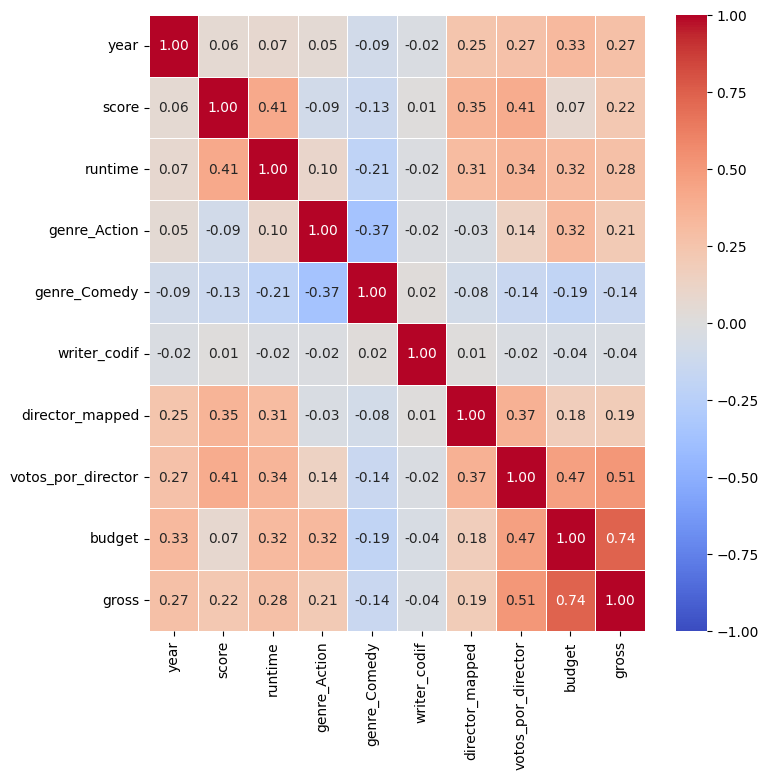

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df_heatmap.corr(numeric_only=True),annot=True,vmin=-1, cmap='coolwarm', fmt=".2f", linewidths=.5);

Modelado

In [51]:
# X = df_heatmap.drop(['gross'], axis=1)
X = df3.drop(['gross'], axis=1)
# X = df3[['votos_por_director','budget']]
y = df3['gross']
# y = df_heatmap['gross']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4348, 28)
(1087, 28)
(4348,)
(1087,)


PipeLine Regresión Lineal

In [53]:
pipeline_lnr = Pipeline([
    ('scaler', StandardScaler()),  
    ('regression', LinearRegression())
    ])

In [54]:
parametros_grid = {'regression__fit_intercept': [True, False]}

In [55]:
grid_search = GridSearchCV(pipeline_lnr, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)#, n_jobs=-1)

In [56]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regression', LinearRegression())]),
             param_grid={'regression__fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error', verbose=1)

In [57]:
mejores_parametros_lnr = grid_search.best_params_

In [58]:
y_pred = grid_search.predict(X_test)

In [59]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [60]:
print(f"Mejores hiperparámetros: {mejores_parametros_lnr}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")

Mejores hiperparámetros: {'regression__fit_intercept': True}
MAE: 58997746.8
MAPE: 10.98 %


Mejores hiperparámetros: {'regression__fit_intercept': True}

Esto te indica que, según la búsqueda de hiperparámetros, el mejor valor para el hiperparámetro fit_intercept de tu modelo de regresión lineal fue True.
MAE: 67801748.76227577

El error absoluto medio (MAE) es una métrica que mide el promedio de las diferencias absolutas entre las predicciones y los valores reales. En este caso, un valor de MAE de 67801748.76 significa que, en promedio, las predicciones de tu modelo difieren en alrededor de 67,801,748.76 unidades del valor real.
MAPE: 50.60132354176165

El error porcentual absoluto medio (MAPE) es una métrica que mide el promedio de los errores porcentuales absolutos entre las predicciones y los valores reales. Un valor de MAPE del 50.60% indica que, en promedio, las predicciones tienen un error del 50.60% en comparación con los valores reales.
MSE: 1.4230961428195888e+16

El error cuadrático medio (MSE) es una métrica que mide el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales. El valor de MSE en notación científica (1.42e+16) indica que el cuadrado medio de las diferencias es bastante grande.

PipeLine Regresión Polinomial

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
pipeline_polyr = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regression', LinearRegression()) 
])

parametros_grid = {
    'poly__degree': [2, 3, 4], 
    'regression__fit_intercept': [True, False]
}

grid_search = GridSearchCV(pipeline_polyr, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)#, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_polyr = grid_search.best_params_
y_pred = grid_search.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_polyr}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparámetros: {'poly__degree': 2, 'regression__fit_intercept': False}
MAE: 58766357.72
MAPE: 31.53 %


Ridge

In [29]:
from sklearn.linear_model import Ridge

In [31]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge()) 
])

parametros_grid = {
    'poly__degree': [2, 3, 4], 
    'ridge__alpha': [0.1, 1.0, 10.0], 
}

grid_search = GridSearchCV(pipeline_ridge, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)#, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_ridge = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_ridge}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores hiperparámetros: {'poly__degree': 2, 'ridge__alpha': 10.0}
MAE: 58771316.31
MAPE: 30.48 %


Lasso

In [34]:
from sklearn.linear_model import Lasso

In [35]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),  
    ('poly', PolynomialFeatures()),  
    ('lasso', Lasso())  
])

parametros_grid = {
    'poly__degree': [2, 3, 4, 5],  
    'lasso__alpha': [0.1, 1.0, 10.0], 
}

grid_search = GridSearchCV(pipeline_lasso, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)#, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_lasso = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_lasso}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros: {'lasso__alpha': 10.0, 'poly__degree': 2}
MAE: 58779387.01
MAPE: 31.43 %


Elastic Net

In [36]:
from sklearn.linear_model import ElasticNet

In [38]:
pipeline_en = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures()), 
    ('elastic_net', ElasticNet())
])

parametros_grid = {
    'poly__degree': [1, 2, 3], 
    'elastic_net__alpha': [0.1, 1.0, 10.0], 
    'elastic_net__l1_ratio': [0.1, 0.5, 0.9]
}

grid_search = GridSearchCV(pipeline_en, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)
mejores_parametros_en = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_en}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros: {'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.9, 'poly__degree': 2}
MAE: 58753371.0
MAPE: 27.43 %


Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MAE: {round(mae_rf, 2)}")
print(f"R2: {round(r2_rf, 2)}")


Random Forest Regressor:
MAE: 57919548.41
R2: 0.64


Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
modelo_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor:")
print(f"MAE: {round(mae_gb, 2)}")
print(f"R2: {round(r2_gb, 2)}")

Gradient Boosting Regressor:
MAE: 57687462.46
R2: 0.66


In [ ]:
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),  
    ('poly', PolynomialFeatures()),  
    ('regressor', ElasticNet())
])

parametros_grid = {
    'scaler' : [StandardScaler(), None],
    'poly__degree': [2, 3, 4, 5],  
    'regressor__alpha': np.logspace(-3, 3, 7), 
    'regressor__l1_ratio': [0.1, 0.5, 0.9] 
}


grid_search = GridSearchCV(pipeline_reg, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_reg = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mejores hiperparámetros: {mejores_parametros_reg}")
print(f"MAE: {round(mae, 2)}")
print(f"MSE: {round(mse, 2)}")


Fitting 5 folds for each of 168 candidates, totalling 840 fits
Mejores hiperparámetros: {'poly__degree': 4, 'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.9, 'scaler': None}
MAE: 60536104.09
MSE: 1.394932960511159e+16


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.749e+19, tolerance: 1.536e+16
  model = cd_fast.enet_coordinate_descent(


In [ ]:
data = {'y_pred': y_pred, 'y_test': y_test, 'diferencia': y_pred - y_test}
comprobacion = pd.DataFrame(data)

In [ ]:
comprobacion

,y_pred,y_test,diferencia
4780,4.198898e+07,1123136.0,4.086584e+07
7294,1.370872e+08,31882724.0,1.052045e+08
3492,5.499903e+07,42593455.0,1.240558e+07
5764,1.620014e+08,134748021.0,2.725340e+07
1612,2.102996e+07,3560932.0,1.746902e+07
...,...,...,...
1403,8.715737e+06,40397.0,8.675340e+06
3220,7.389304e+07,19745922.0,5.414711e+07
1889,2.792393e+07,31347154.0,-3.423228e+06
2794,5.751446e+06,10426506.0,-4.675060e+06


In [ ]:
comprobacion.sort_values(by='diferencia', ascending=False)

,y_pred,y_test,diferencia
6079,1.248546e+09,2.841391e+08,9.644072e+08
4870,1.168874e+09,3.910812e+08,7.777925e+08
6378,7.703718e+08,1.976876e+08,5.726842e+08
6692,7.253669e+08,2.090357e+08,5.163312e+08
7261,8.453288e+08,3.929248e+08,4.524040e+08
...,...,...,...
209,8.569012e+07,7.929106e+08,-7.072204e+08
7051,2.260968e+08,9.625429e+08,-7.364461e+08
6262,5.133870e+08,1.281508e+09,-7.681211e+08
7450,2.512589e+08,1.074427e+09,-8.231685e+08


In [ ]:
df3.shape

(5435, 10)

In [ ]:
cine_target = y

In [ ]:
df3['gross'].nunique()

5432

In [ ]:
df3['gross'].value_counts()

gross
14000000.0     3
10000000.0     2
204826668.0    1
71571300.0     1
34816824.0     1
              ..
171120329.0    1
230098753.0    1
126216940.0    1
39673807.0     1
461421559.0    1
Name: count, Length: 5432, dtype: int64

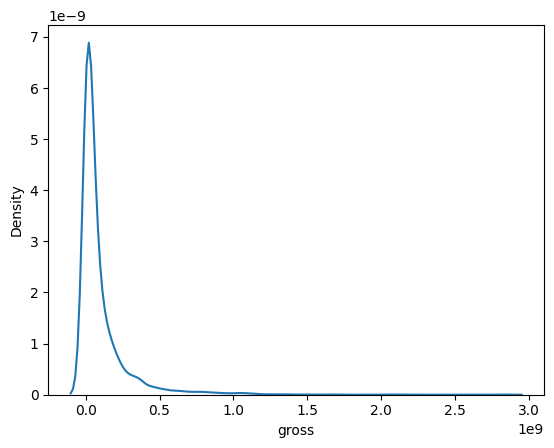

In [ ]:
sns.kdeplot(cine_target);

In [ ]:
from scipy import stats

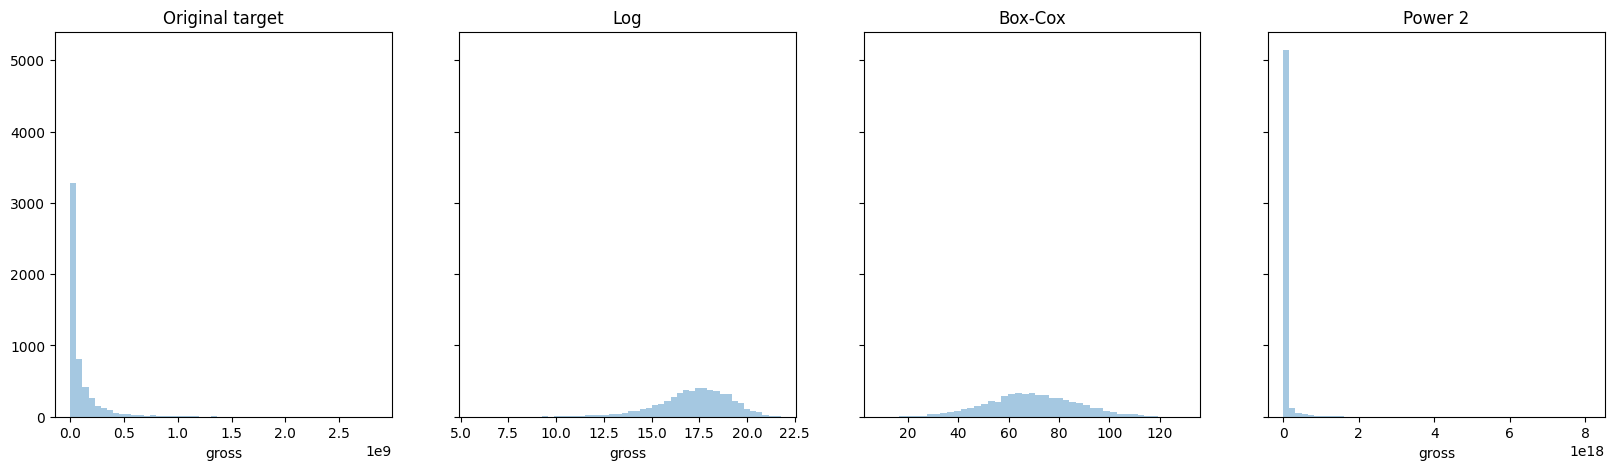

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Original target
sns.distplot(cine_target, kde=False, ax=axes[0])
axes[0].set_title("Original target")

# Logaritmic
sns.distplot(np.log(cine_target),kde=False, ax=axes[1])
axes[1].set_title("Log")

# Box-cox
sns.distplot(stats.boxcox(cine_target)[0],kde=False, ax=axes[2])
axes[2].set_title("Box-Cox");

# Power 2
sns.distplot(np.power(cine_target, 2),kde=False, ax=axes[3])
axes[3].set_title("Power 2");

In [ ]:
from scipy.stats import boxcox

In [ ]:
y_transformed, lambda_value = boxcox(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

In [ ]:
# idea de mostrar una grafica con que peliculas por categorias de facturación son las que mejor predice en funcion a los presupuestos?

In [81]:
pipeline_lnr = Pipeline([
    ('scaler', StandardScaler()),  
    ('regression', LinearRegression())
    ])

parametros_grid = {'regression__fit_intercept': [True, False]}

final_model = GridSearchCV(pipeline_lnr, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)#, n_jobs=-1)
final_model.fit(X_train, y_train)
mejores_parametros_lnr = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_lnr}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores hiperparámetros: {'regression__fit_intercept': True}
MAE: 58997746.8
MAPE: 10.98 %


In [82]:
import pickle

In [83]:
with open('final_model.pkl', "wb") as archivo_salida:
    pickle.dump(final_model, archivo_salida)

In [ ]:
with open('my_model.pkl', 'rb') as archivo_entrada:
    model_pretrained = pickle.load(archivo_entrada)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4348 entries, 4033 to 1555
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                4348 non-null   float64
 1   score               4348 non-null   float64
 2   votes               4348 non-null   float64
 3   budget              4348 non-null   float64
 4   runtime             4348 non-null   float64
 5   genre_Action        4348 non-null   int32  
 6   genre_Adventure     4348 non-null   int32  
 7   genre_Animation     4348 non-null   int32  
 8   genre_Biography     4348 non-null   int32  
 9   genre_Comedy        4348 non-null   int32  
 10  genre_Crime         4348 non-null   int32  
 11  genre_Drama         4348 non-null   int32  
 12  genre_Family        4348 non-null   int32  
 13  genre_Fantasy       4348 non-null   int32  
 14  genre_History       4348 non-null   int32  
 15  genre_Horror        4348 non-null   int32  
 16  genre_Mu

In [71]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4348 entries, 4033 to 1555
Series name: gross
Non-Null Count  Dtype  
--------------  -----  
4348 non-null   float64
dtypes: float64(1)
memory usage: 67.9 KB


In [74]:
train = pd.concat([X_train, y_train], axis=1)

In [78]:
train.to_csv('train.csv', index=False)

In [76]:
test = pd.concat([X_test, y_test], axis=1)

In [79]:
test.to_csv('test.csv', index=False)